<a href="https://colab.research.google.com/github/rubeshajith/Classification-Project/blob/main/Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices.
# The objective is to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.
#Data Description
# Battery_power - Total energy a battery can store in one time measured in mAh

### Blue - Has bluetooth or not 

###Clock_speed - speed at which microprocessor executes instructions

###Dual_sim - Has dual sim support or not

###Fc - Front Camera mega pixels

###Four_g - Has 4G or not

###Int_memory - Internal Memory in Gigabytes

###M_dep - Mobile Depth in cm

###Mobile_wt - Weight of mobile phone

###N_cores - Number of cores of processor

###Pc - Primary Camera mega pixels

###Px_height - Pixel Resolution Height

###Px_width - Pixel Resolution Width

###Ram - Random Access Memory in Mega Bytes

###Sc_h - Screen Height of mobile in cm

###Sc_w - Screen Width of mobile in cm

###Talk_time - longest time that a single battery charge will last when you are

###Three_g - Has 3G or not

###Touch_screen - Has touch screen or not

###Wifi - Has wifi or not

###Price_range - This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

In [2]:
# Importing Libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [3]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Loading the dataset
df = pd.read_csv('/content/drive/MyDrive/data/project/Mobile Price Range Prediction/data_mobile_price_range.csv')

In [5]:
# To display all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
# Displaying first 5 rows
df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2   2         20       756  2549     9     7         19   
1        136        3   6        905      1988  2631    17     3          7   
2        145        5   6       1263      1716  2603    11     2          9   
3        131        6   9       1216      1786  2769    16     8         11   
4        141        2  14       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1

In [7]:
# Getting the shape of the dataset
df.shape

(2000, 21)

In [8]:
# Renaming columns
df.rename(columns = {'blue':'bluetooth', 'fc':'front_cam_pix','m_dep':'mobile_depth','pc':'rear_cam_pix','sc_h':'screen_height','sc_w':'screen_width'}, inplace = True)

In [9]:
# interpreting statistically
df.describe()

battery_power  bluetooth  clock_speed     dual_sim  front_cam_pix  \
count    2000.000000  2000.0000  2000.000000  2000.000000    2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500       4.309500   
std       439.418206     0.5001     0.816004     0.500035       4.341444   
min       501.000000     0.0000     0.500000     0.000000       0.000000   
25%       851.750000     0.0000     0.700000     0.000000       1.000000   
50%      1226.000000     0.0000     1.500000     1.000000       3.000000   
75%      1615.250000     1.0000     2.200000     1.000000       7.000000   
max      1998.000000     1.0000     3.000000     1.000000      19.000000   

            four_g   int_memory  mobile_depth    mobile_wt      n_cores  \
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000   
mean      0.521500    32.046500      0.501750   140.249000     4.520500   
std       0.499662    18.145715      0.288416    35.399655     2.287837   
min       0.000000     2.000000      0.100000    80.000000     1.000000   
25%       0.000000    16.000000      0.200000   109.000000     3.000000   
50%       1.000000    32.000000      0.500000   141.000000     4.000000   
75%       1.000000    48.000000      0.800000   170.000000     7.000000   
max       1.000000    64.000000      1.000000   200.000000     8.000000   

       rear_cam_pix    px_height     px_width          ram  screen_height  \
count   2000.000000  2000.000000  2000.000000  2000.000000    2000.000000   
mean       9.916500   645.108000  1251.515500  2124.213000      12.306500   
std        6.064315   443.780811   432.199447  1084.732044       4.213245   
min        0.000000     0.000000   500.000000   256.000000       5.000000   
25%        5.000000   282.750000   874.750000  1207.500000       9.000000   
50%       10.000000   564.000000  1247.000000  2146.500000      12.000000   
75%       15.000000   947.250000  1633.000000  3064.500000      16.000000   
max       20.000000  1960.000000  1998.000000  3998.000000      19.000000   

       screen_width    talk_time      three_g  touch_screen         wifi  \
count   2000.000000  2000.000000  2000.000000   2000.000000  2000.000000   
mean       5.767000    11.011000     0.761500      0.503000     0.507000   
std        4.356398     5.463955     0.426273      0.500116     0.500076   
min        0.000000     2.000000     0.000000      0.000000     0.000000   
25%        2.000000     6.000000     1.000000      0.000000     0.000000   
50%        5.000000    11.000000     1.000000      1.000000     1.000000   
75%        9.000000    16.000000     1.000000      1.000000     1.000000   
max       18.000000    20.000000     1.000000      1.000000     1.000000   

       price_range  
count  2000.000000  
mean      1.500000  
std       1.118314  
min       0.000000  
25%       0.750000  
50%       1.500000  
75%       2.250000  
max       3.000000

In [10]:
# Information on null values and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   bluetooth      2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   front_cam_pix  2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   mobile_depth   2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  rear_cam_pix   2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  screen_height  2000 non-null   int64  
 15  screen_width   2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [11]:
# Checking for null values
df.isna().sum()

battery_power    0
bluetooth        0
clock_speed      0
dual_sim         0
front_cam_pix    0
four_g           0
int_memory       0
mobile_depth     0
mobile_wt        0
n_cores          0
rear_cam_pix     0
px_height        0
px_width         0
ram              0
screen_height    0
screen_width     0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

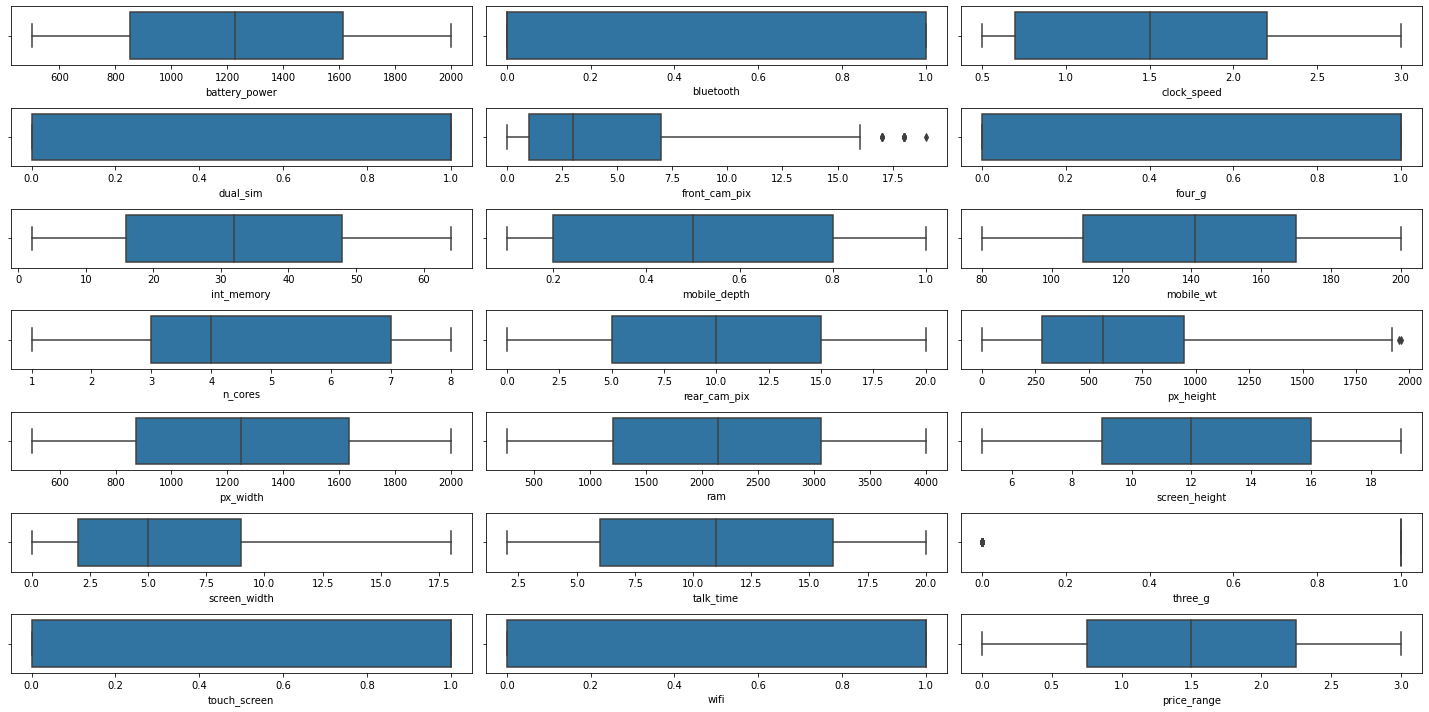

In [12]:
# Plotting boxplot for each features in our dataset
plt.figure(figsize = (20, 10))

x = 1
for column in df.columns :
    plt.subplot(7, 3, x)
    sns.boxplot(df[column])
    x = x+1
plt.tight_layout()

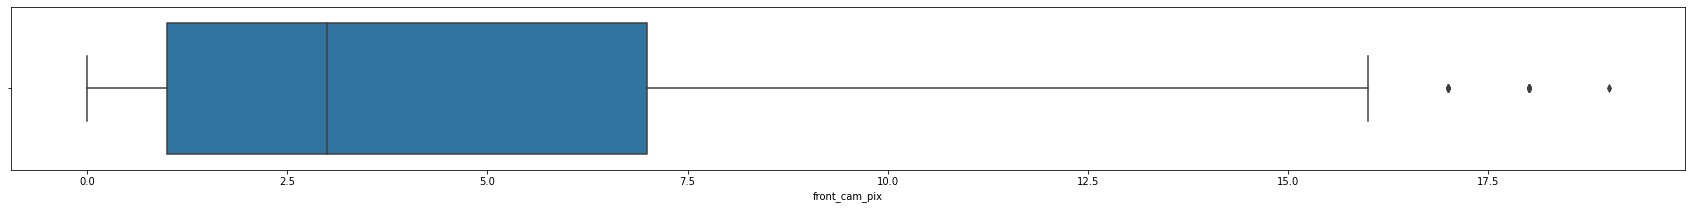

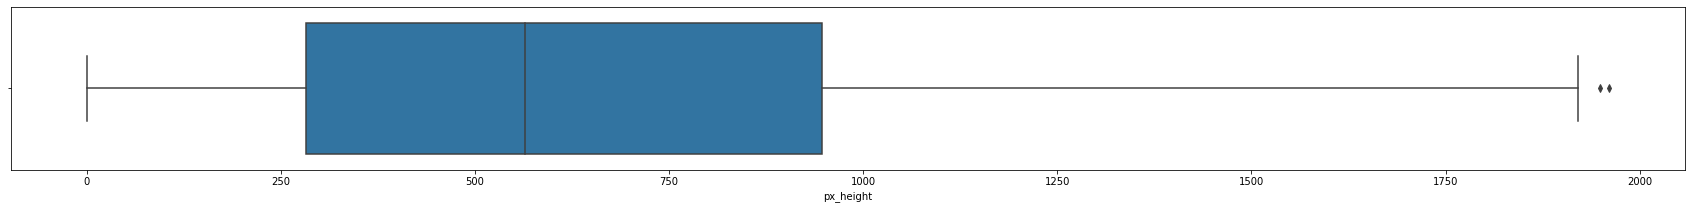

In [13]:
# plotting seperate box_plots which detected outliers
plt.figure(figsize = (30,3))
sns.boxplot(df.front_cam_pix)
plt.figure(figsize = (30,3))
sns.boxplot(df.px_height)


In [14]:
front_cam_pix_ot =df.front_cam_pix.value_counts(ascending= True).loc[lambda x :x <= 11].to_frame(name="Counts").sort_index()
# pr_count_pxh.columns = ["price_range","count_of_zeros"]
front_cam_pix_ot.index.name = "front_cam_pix"
front_cam_pix_ot

Counts
front_cam_pix        
17                  6
18                 11
19                  1

In [15]:
df.px_height.sort_values(ascending= False)[:2].to_frame()

px_height
1771       1960
988        1949

Above printed dataframes are the outliers which were detected by box_plot. i.e, Front camerea pixels with 19MP has count of one, 17MP has count of six and 18MP with eleven counts so total of 18 rows 

Pixel height have two outlier which were detected by boxplot 

So 20 outlier rows which is nearly 1% of data in our datset 

We're implementing Logistic Regression and they also follows similar assumptions of Linear Regression

Logistic Regression also suffers from extreme outliers, We aren't removing this outliers, they are not that extreme to do so.

### Handling Missing Values

In [16]:
# Interpreting our DataFrame Statistically
df.describe()

battery_power  bluetooth  clock_speed     dual_sim  front_cam_pix  \
count    2000.000000  2000.0000  2000.000000  2000.000000    2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500       4.309500   
std       439.418206     0.5001     0.816004     0.500035       4.341444   
min       501.000000     0.0000     0.500000     0.000000       0.000000   
25%       851.750000     0.0000     0.700000     0.000000       1.000000   
50%      1226.000000     0.0000     1.500000     1.000000       3.000000   
75%      1615.250000     1.0000     2.200000     1.000000       7.000000   
max      1998.000000     1.0000     3.000000     1.000000      19.000000   

            four_g   int_memory  mobile_depth    mobile_wt      n_cores  \
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000   
mean      0.521500    32.046500      0.501750   140.249000     4.520500   
std       0.499662    18.145715      0.288416    35.399655     2.287837   
min       0.000000     2.000000      0.100000    80.000000     1.000000   
25%       0.000000    16.000000      0.200000   109.000000     3.000000   
50%       1.000000    32.000000      0.500000   141.000000     4.000000   
75%       1.000000    48.000000      0.800000   170.000000     7.000000   
max       1.000000    64.000000      1.000000   200.000000     8.000000   

       rear_cam_pix    px_height     px_width          ram  screen_height  \
count   2000.000000  2000.000000  2000.000000  2000.000000    2000.000000   
mean       9.916500   645.108000  1251.515500  2124.213000      12.306500   
std        6.064315   443.780811   432.199447  1084.732044       4.213245   
min        0.000000     0.000000   500.000000   256.000000       5.000000   
25%        5.000000   282.750000   874.750000  1207.500000       9.000000   
50%       10.000000   564.000000  1247.000000  2146.500000      12.000000   
75%       15.000000   947.250000  1633.000000  3064.500000      16.000000   
max       20.000000  1960.000000  1998.000000  3998.000000      19.000000   

       screen_width    talk_time      three_g  touch_screen         wifi  \
count   2000.000000  2000.000000  2000.000000   2000.000000  2000.000000   
mean       5.767000    11.011000     0.761500      0.503000     0.507000   
std        4.356398     5.463955     0.426273      0.500116     0.500076   
min        0.000000     2.000000     0.000000      0.000000     0.000000   
25%        2.000000     6.000000     1.000000      0.000000     0.000000   
50%        5.000000    11.000000     1.000000      1.000000     1.000000   
75%        9.000000    16.000000     1.000000      1.000000     1.000000   
max       18.000000    20.000000     1.000000      1.000000     1.000000   

       price_range  
count  2000.000000  
mean      1.500000  
std       1.118314  
min       0.000000  
25%       0.750000  
50%       1.500000  
75%       2.250000  
max       3.000000

From the above describe method we can see variables with have 0 values which is unlikely for few columns namely pixel_height and screen_width.

In [17]:
df[df.px_height == 0]

battery_power  bluetooth  clock_speed  dual_sim  front_cam_pix  four_g  \
1481           1834          0          2.1         0              7       1   
1933            897          1          2.0         0              3       1   

      int_memory  mobile_depth  mobile_wt  n_cores  rear_cam_pix  px_height  \
1481          40           0.1         99        4            11          0   
1933           2           0.6        154        8            10          0   

      px_width   ram  screen_height  screen_width  talk_time  three_g  \
1481      1987  3692             13             0         16        1   
1933       994  1958              7             5          7        1   

      touch_screen  wifi  price_range  
1481             1     0            3  
1933             1     0            1

Since they are continous variables, and also similar pixel width doesn't have similar pixel height so we're replacing zero values to there means with respect to price classes

In [18]:
# printing df of pixel_height containing zero with respect to price_range and their counts
pr_count_pxh = df.price_range[df['px_height'] == 0].value_counts().to_frame(name="Count_of_zeros").sort_index()
pr_count_pxh.index.name = "price_range"
pr_count_pxh

Count_of_zeros
price_range                
1                         1
3                         1

In [19]:
# Printing pixel height means with respect to price ranges
price_ph_mean = np.ceil(df.groupby("price_range")["px_height"].mean())
price_ph_mean.to_frame(name="px_height_mean")

px_height_mean
price_range                
0                     537.0
1                     667.0
2                     633.0
3                     745.0

Replacing Pixel Height feature's zero values to their respective mean.

In [20]:
df["px_height"] = df["px_height"].replace(0, np.nan)

In [21]:
df["px_height"] = df["px_height"].fillna(np.ceil(df.groupby("price_range")["px_height"].transform("mean")))

In [22]:
# printing df of screen_width containing zeros with respect to price_range and their counts
pr_count_sw = df.price_range[df['screen_width'] == 0].value_counts().to_frame(name="Count_of_zeros").sort_index()
pr_count_sw.index.name = "price_range"
pr_count_sw

Count_of_zeros
price_range                
0                        49
1                        48
2                        44
3                        39

In [23]:
# Printing screen_width means with respect to price ranges
price_sw_mean = np.ceil(df.groupby("price_range")["screen_width"].mean())
price_sw_mean.to_frame(name="screen_width_mean")

screen_width_mean
price_range                   
0                          6.0
1                          6.0
2                          6.0
3                          7.0

Replacing Screen Width feature's zero values to their respective mean.

In [24]:
df["screen_width"] = df["screen_width"].replace(0, np.nan)

In [25]:
df["screen_width"] = df["screen_width"].fillna(np.ceil(df.groupby("price_range")["screen_width"].transform("mean")))

In [26]:
# Converting units of cm to inches
# 1 inch is equal to 2.54 cm :
df["screen_height"] = df["screen_height"]/2.54
df["screen_width"] = df["screen_width"]/2.54


In [27]:
# converting cm to mm for mobile depth column
df["mobile_depth"] = df["mobile_depth"]*10

In [28]:
df.describe()

battery_power  bluetooth  clock_speed     dual_sim  front_cam_pix  \
count    2000.000000  2000.0000  2000.000000  2000.000000    2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500       4.309500   
std       439.418206     0.5001     0.816004     0.500035       4.341444   
min       501.000000     0.0000     0.500000     0.000000       0.000000   
25%       851.750000     0.0000     0.700000     0.000000       1.000000   
50%      1226.000000     0.0000     1.500000     1.000000       3.000000   
75%      1615.250000     1.0000     2.200000     1.000000       7.000000   
max      1998.000000     1.0000     3.000000     1.000000      19.000000   

            four_g   int_memory  mobile_depth    mobile_wt      n_cores  \
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000   
mean      0.521500    32.046500      5.017500   140.249000     4.520500   
std       0.499662    18.145715      2.884155    35.399655     2.287837   
min       0.000000     2.000000      1.000000    80.000000     1.000000   
25%       0.000000    16.000000      2.000000   109.000000     3.000000   
50%       1.000000    32.000000      5.000000   141.000000     4.000000   
75%       1.000000    48.000000      8.000000   170.000000     7.000000   
max       1.000000    64.000000     10.000000   200.000000     8.000000   

       rear_cam_pix    px_height     px_width          ram  screen_height  \
count   2000.000000  2000.000000  2000.000000  2000.000000    2000.000000   
mean       9.916500   645.816000  1251.515500  2124.213000       4.845079   
std        6.064315   443.317057   432.199447  1084.732044       1.658758   
min        0.000000     1.000000   500.000000   256.000000       1.968504   
25%        5.000000   284.000000   874.750000  1207.500000       3.543307   
50%       10.000000   568.000000  1247.000000  2146.500000       4.724409   
75%       15.000000   947.250000  1633.000000  3064.500000       6.299213   
max       20.000000  1960.000000  1998.000000  3998.000000       7.480315   

       screen_width    talk_time      three_g  touch_screen         wifi  \
count   2000.000000  2000.000000  2000.000000   2000.000000  2000.000000   
mean       2.518504    11.011000     0.761500      0.503000     0.507000   
std        1.561124     5.463955     0.426273      0.500116     0.500076   
min        0.393701     2.000000     0.000000      0.000000     0.000000   
25%        1.181102     6.000000     1.000000      0.000000     0.000000   
50%        2.362205    11.000000     1.000000      1.000000     1.000000   
75%        3.543307    16.000000     1.000000      1.000000     1.000000   
max        7.086614    20.000000     1.000000      1.000000     1.000000   

       price_range  
count  2000.000000  
mean      1.500000  
std       1.118314  
min       0.000000  
25%       0.750000  
50%       1.500000  
75%       2.250000  
max       3.000000

### Feature Creation

In [29]:
# Creating new feature wether mobile has front camera or not
df.loc[df["front_cam_pix"] ==0, "has_front_cam"] = 0
df.loc[df["front_cam_pix"] >0, "has_front_cam"] = 1
df["has_front_cam"] = df["has_front_cam"].astype(int)

In [30]:
# Creating new feature wether mobile has rear camera or not
df.loc[df["rear_cam_pix"] ==0, "has_rear_cam"] = 0
df.loc[df["rear_cam_pix"] >0, "has_rear_cam"] = 1


In [31]:
df['has_front_cam'].value_counts()

1    1526
0     474
Name: has_front_cam, dtype: int64

In [32]:
df['has_rear_cam'].value_counts()

1.0    1899
0.0     101
Name: has_rear_cam, dtype: int64

In [33]:
# Creating new feature wether a phone has HD quality or not
df.loc[(df['px_width'] < 1280) | (df['px_height'] < 720), 'hd_quality'] = 0
df['hd_quality'] = df['hd_quality'].fillna(1)

In [34]:
df["hd_quality"].value_counts()

0.0    1437
1.0     563
Name: hd_quality, dtype: int64

Screen size is nothing but diagonal length of a phone which can be determined with the help of length and width of screen which is present in our dataset with the help of pythagoras theorem.

In [35]:
# Creating screen size feature with pythagoras theorem (hypotenuse = np.sqrt(a^2+b^2) a,b is height and width)
df["screen_size"] = np.sqrt(df["screen_height"]**2 +df["screen_width"]**2).round(1)

Pixel per inch : It represents a measurement of pixel density of a screen, the density is measured as the number of pixels that fit on a 1 inch line

For calculating it first we need to calculate the number of pixels that fit on the diagonal, with the help of pythagoras theorem we can find diagonal pixel size making use of pixel height and width

PPI = do/di
do is no of pixels that fit on the diagonal
di is diagonal screen size (we've already created this as a feature screen size)


In [36]:
# Creating pixel_per_inch feature with the help of pythagoras theorem and the above formula
df["pixel_per_inch"] = ((np.sqrt(df["px_height"]**2 +df["px_width"]**2)) / df["screen_size"]).round(1)

In [37]:
# Binning ram size for vistualization purpose

bin_ram_size = [256, 512, 1000, 2000, 3000, 4000]
label_ram = ['256 to 512 MB', '512 MB to 1GB', '1 to 2 GB', '2 to 3 GB', '3 to 4 GB']

df['ram_size'] = pd.cut(df['ram'], bins = bin_ram_size, labels = label_ram)

df['ram_size'].value_counts()

2 to 3 GB        556
3 to 4 GB        524
1 to 2 GB        522
512 MB to 1GB    255
256 to 512 MB    142
Name: ram_size, dtype: int64

In [38]:
# Printing segregated ramsizes and counts
ram_df = df["ram_size"].value_counts(ascending=True).to_frame(name="Counts")
ram_df.index.name = "approx_ramsize_in_gb"
ram_df

Counts
approx_ramsize_in_gb        
256 to 512 MB            142
512 MB to 1GB            255
1 to 2 GB                522
3 to 4 GB                524
2 to 3 GB                556

At present the top 10 slimmest phones has a mobile depth ranging from 6.3 to 7.4mm so we are considering mobile phones with mobile depth below 7 as slimmest and similarly top 10 lightest mobiles has a weight ranging from 80.2g to 155g, so similarly lets consider below 155g as lightest phones

In [39]:
# Creating a feature "slim_and_light_weight_touch_mob" that has less depth, less weigth and touch screen
df.loc[(df['mobile_depth'] <= 7 ) & (df['mobile_wt'] < 155)& (df['touch_screen']== 1), 'slim_and_light_weight_touch_mob'] = 1
df['slim_and_light_weight_touch_mob'] = df['slim_and_light_weight_touch_mob'].fillna(0)

In [40]:
df.slim_and_light_weight_touch_mob.value_counts().to_frame(name="counts")

counts
0.0    1528
1.0     472

Its likely to have less counts in silm and lightest mobile in our dataset

In [41]:
# Binning clock speed for vistualization purpose

clock_speed_bin = [0, 1.0,1.5,2.0,2.5,3.0]
clock_bin_label = ['upto 1GHz', 'upto 1.5GHz', 'upto 2GHz', 'upto 2.5GHz', 'upto 3.0GHz']

df['speed'] = pd.cut(df['clock_speed'], bins = clock_speed_bin, labels = clock_bin_label)

df.head()

battery_power  bluetooth  clock_speed  dual_sim  front_cam_pix  four_g  \
0            842          0          2.2         0              1       0   
1           1021          1          0.5         1              0       1   
2            563          1          0.5         1              2       1   
3            615          1          2.5         0              0       0   
4           1821          1          1.2         0             13       1   

   int_memory  mobile_depth  mobile_wt  n_cores  rear_cam_pix  px_height  \
0           7           6.0        188        2             2       20.0   
1          53           7.0        136        3             6      905.0   
2          41           9.0        145        5             6     1263.0   
3          10           8.0        131        6             9     1216.0   
4          44           6.0        141        2            14     1208.0   

   px_width   ram  screen_height  screen_width  talk_time  three_g  \
0       756  2549       3.543307      2.755906         19        0   
1      1988  2631       6.692913      1.181102          7        1   
2      1716  2603       4.330709      0.787402          9        1   
3      1786  2769       6.299213      3.149606         11        1   
4      1212  1411       3.149606      0.787402         15        1   

   touch_screen  wifi  price_range  has_front_cam  has_rear_cam  hd_quality  \
0             0     1            1              1           1.0         0.0   
1             1     0            2              0           1.0         1.0   
2             1     0            2              1           1.0         1.0   
3             0     0            2              0           1.0         1.0   
4             1     0            1              1           1.0         0.0   

   screen_size  pixel_per_inch   ram_size  slim_and_light_weight_touch_mob  \
0          4.5           168.1  2 to 3 GB                              0.0   
1          6.8           321.2  2 to 3 GB                              1.0   
2          4.4           484.2  2 to 3 GB                              0.0   
3          7.0           308.7  2 to 3 GB                              0.0   
4          3.2           534.8  1 to 2 GB                              1.0   

         speed  
0  upto 2.5GHz  
1    upto 1GHz  
2    upto 1GHz  
3  upto 2.5GHz  
4  upto 1.5GHz

## Univariate Analysis

In [42]:
sns.set_palette("crest")

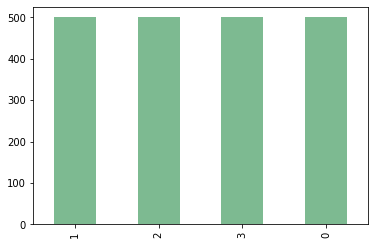

In [43]:
# Checking our classes count

df["price_range"].value_counts().plot(kind="bar")

Our classes are equally distributed

In [44]:
# Converting float type to int 
newly_created_binary_var = ["has_front_cam","has_rear_cam","hd_quality","slim_and_light_weight_touch_mob"]
for variable in newly_created_binary_var:
  df[variable] = df[variable].astype(int)

In [45]:
# Creating list of binary variables for plotting purpose
binary_features = ["bluetooth","dual_sim","four_g","three_g","touch_screen","wifi","has_front_cam","has_rear_cam",
            "hd_quality","slim_and_light_weight_touch_mob"]                

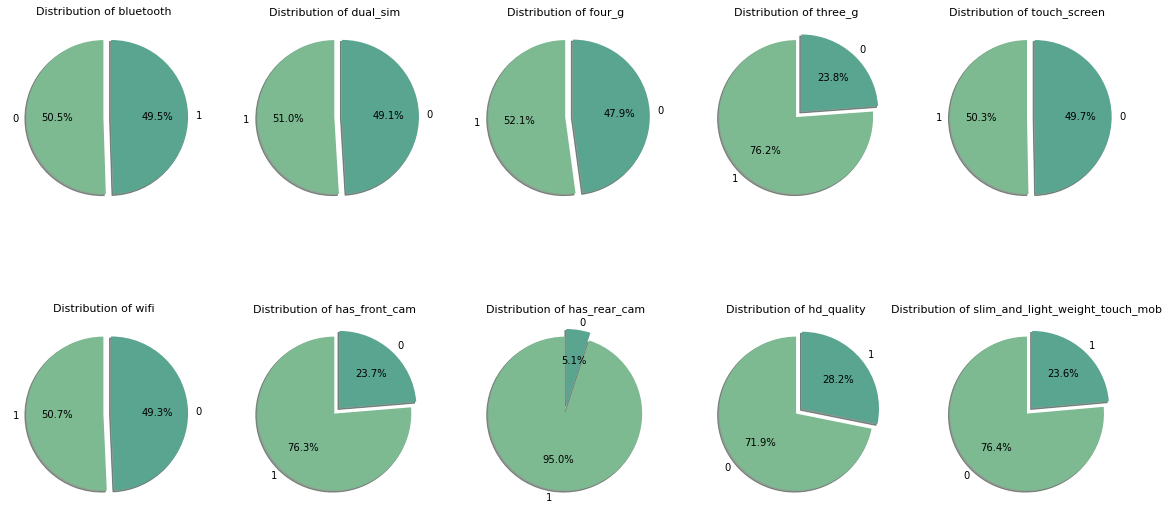

In [46]:
# plotting Pie chart for our binary variables
plt.figure(figsize=(20,10))
count = 0

for feature in binary_features:
    myexplode = [0, 0.1]
    
    labels = df[feature].value_counts().index
    sizes = df[feature].value_counts().values  
    
    plt.subplot(2,5,count+1)
    plt.pie(sizes, labels=labels, explode = myexplode, shadow = True, startangle=90, autopct='%1.1f%%')
    plt.title(f'Distribution of {binary_features[count]}', color = 'black',fontsize = 11)
    count += 1



*   Most of the features in our data are almost equally distributed namely Bluetooth, Dual_sim, Touch_screen and wifi

*   Comparing four_g and three_g we can say that 76.2% of our data contains 3g sim slot and 4g sim slot is of 52.1% , also 3g sims work on 4g slot but not vise versa

*   We can say that 95% of our data has rear camera and 76.3% has front camera and also if 5.1% which doesn't have rear camera might not have front camera as well

*   71.9% of our data doesn't have hd quality resolution

*   only 23.6% of our data contain slim and light weight phones which is likely







Text(0.5, 1.0, 'screen_size distribution')

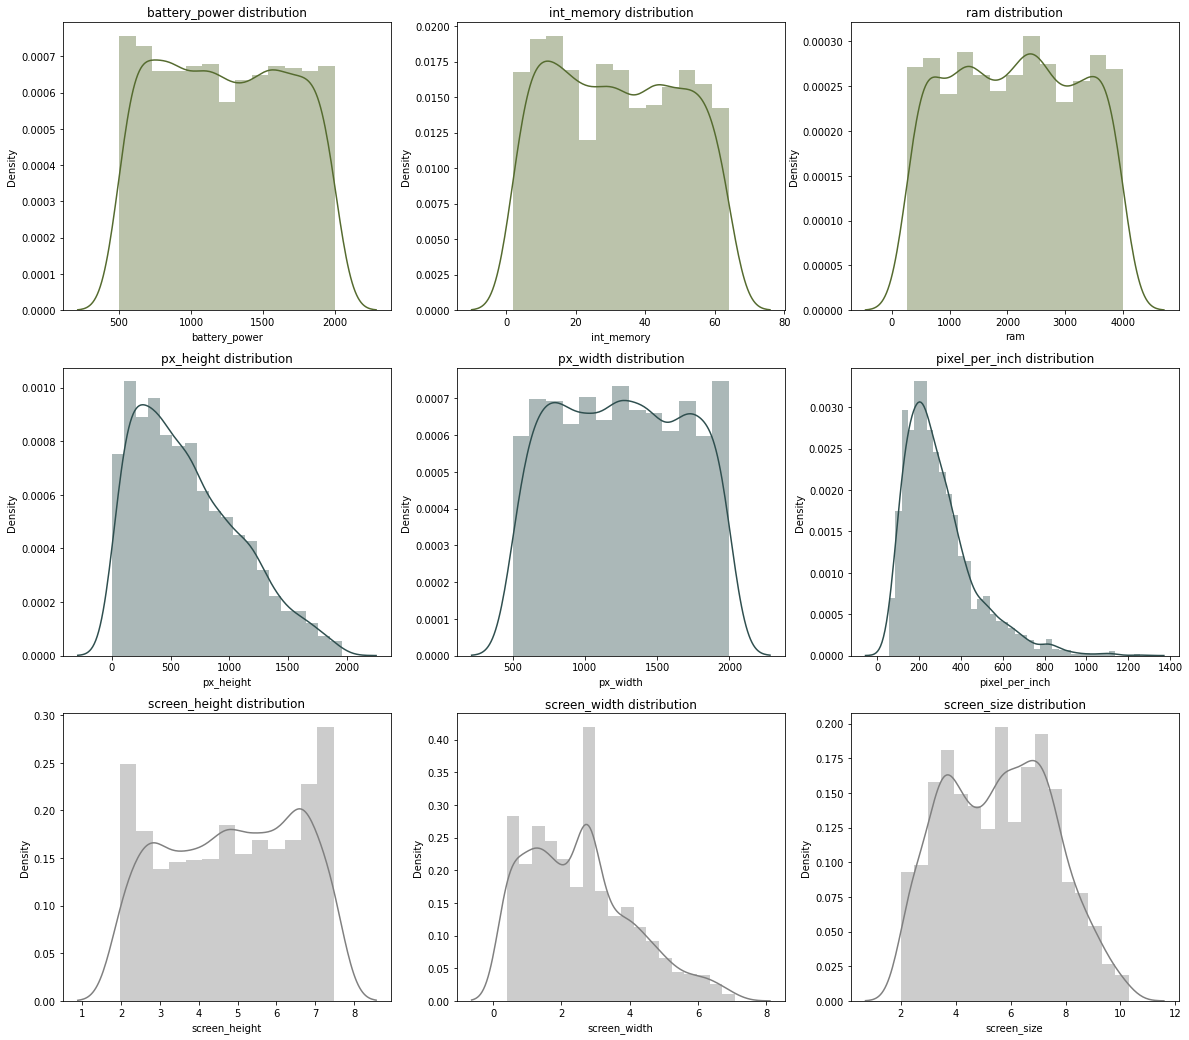

In [49]:
# Plotting distplot for our continuous variables

plt.figure(figsize=(20,18))

plt.subplot(3,3,1)
sns.distplot(df['battery_power'], color="darkolivegreen").set_title('battery_power distribution')
plt.subplot(3,3,2)
sns.distplot(df['int_memory'], color="darkolivegreen").set_title('int_memory distribution')
plt.subplot(3,3,3)
sns.distplot(df['ram'], color="darkolivegreen").set_title('ram distribution')
plt.subplot(3,3,4)
sns.distplot(df['px_height'], color="darkslategrey").set_title('px_height distribution')
plt.subplot(3,3,5)
sns.distplot(df['px_width'], color="darkslategrey").set_title('px_width distribution')
plt.subplot(3,3,6)
sns.distplot(df['pixel_per_inch'], color="darkslategrey").set_title('pixel_per_inch distribution')
plt.subplot(3,3,7)
sns.distplot(df['screen_height'], color="grey").set_title('screen_height distribution')
plt.subplot(3,3,8)
sns.distplot(df['screen_width'], color="grey").set_title('screen_width distribution')
plt.subplot(3,3,9)
sns.distplot(df['screen_size'], color="grey").set_title('screen_size distribution')



*   Battery power, internal_memory, Ram are almost normally distributed with respect to their set of feature values and also around 2.5gb has most count in ram similarly others

*   In second row pixel_height is slightly postively skewed, pixel_width and pixel_per inch is normally distibuted 

*   In third row screen_height and screen_size are normally distributed unlike screen_width which is slightly positive skewed

Further in bivariate we can analyse more with respect to price range





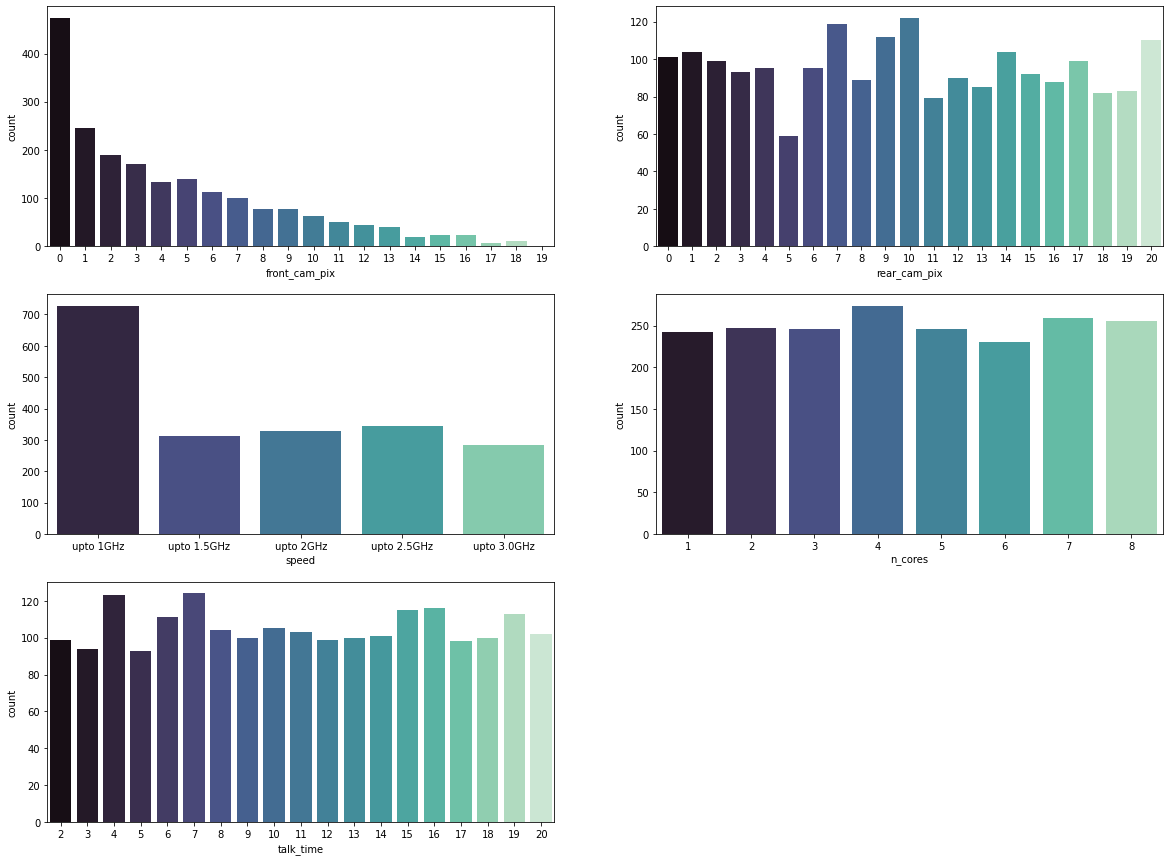

In [51]:
# Plotting countplot for distinct variables
distinct_features = ["front_cam_pix","rear_cam_pix","speed","n_cores","talk_time"]
plt.figure(figsize=(20,15))
count = 0
for feature in distinct_features:
  plt.subplot(3,2,count+1)
  sns.countplot(df[feature], palette = 'mako')
  count += 1

We can interpret highest and lowest form our above plot, i.e, 400 mobiles in our dataset doesn't have front camera, 100 of them don't have rear camera.
Rest all are easily interpretable or almost normally distributed

## Bivariate Analysis

Text(0.5, 1.0, 'RAM distribution of price range 3')

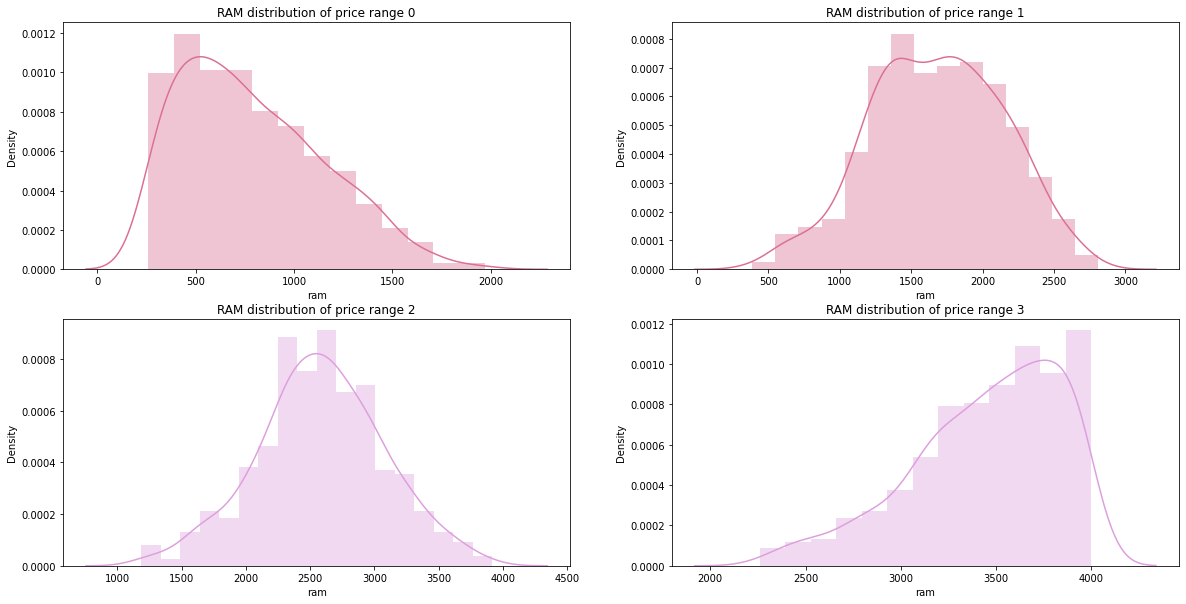

In [52]:
# Plotting Ram vs Each separate classes

df_price_0 = df[df['price_range']==0]
df_price_1 = df[df['price_range']==1]
df_price_2 = df[df['price_range']==2]
df_price_3 = df[df['price_range']==3]

plt.figure(figsize = (20, 10))
plt.subplot(2,2,1)
sns.distplot(df_price_0['ram'],color="palevioletred")
plt.title('RAM distribution of price range 0')
plt.subplot(2,2,2)
sns.distplot(df_price_1['ram'],color="palevioletred")
plt.title('RAM distribution of price range 1')
plt.subplot(2,2,3)
sns.distplot(df_price_2['ram'],color="plum")
plt.title('RAM distribution of price range 2')
plt.subplot(2,2,4)
sns.distplot(df_price_3['ram'],color="plum")
plt.title('RAM distribution of price range 3')

* We can see from the above chart that the distribution is looking very different if we compare it per price range 

* For the the price range 0 majority of the phone are ranging from 400 - 700 mb RAM, and the max is around 2000 mb

* for  price range 1 ranging from 500 - 3000 with the highest distribution on RAM around 1300 - 2100mb

* For the price range 2 the RAM distribution is perfectly normal and is ranging  from 1000 - 4000 mb with the highest distribution around 2500mb

* For the highest price range the ram range from 2000mb to - 4000 mb with the highest distribution around 3500 to 4000 mb

* With this we can conclude that the higher the price range the higher the ram size 



Since we can interpret this distplots with respect to classes in our pairplot (i.e, in diagonal charts) which we plot in multivariate analysis, so we're not going to plot for all variables 

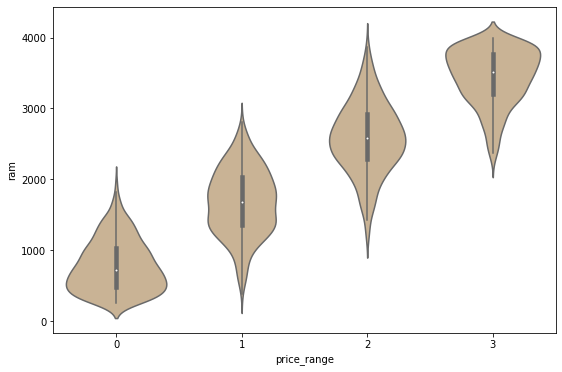

In [54]:
# Plotting violinplot for ram vs price_ranges
plt.figure(figsize=(9,6))
sns.violinplot(x = 'price_range', y = 'ram', data = df, color="tan")

* In the above violin plot we can say ram size distribution increases when price range increases also in price_range0 density is more in 500mb which means in this price_range bucket their are more phones around 500mb ram size, in price_range1 density is more in 1500 - 2000mb, in price_range2 density is more in 2500mb and in price_range3 density is more likely in 3800mb. with the help of violin plot we can identify the denser part

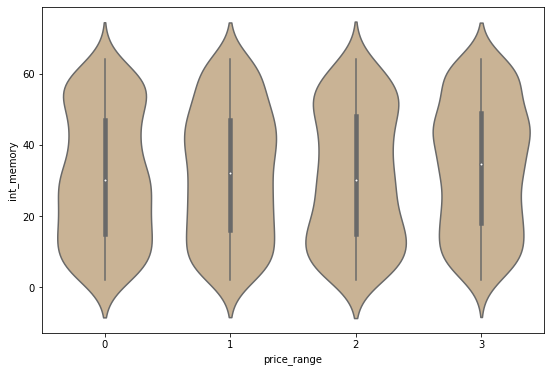

In [55]:
# Plotting violinplot for internal_memory vs price_ranges
plt.figure(figsize=(9,6))
sns.violinplot(x = 'price_range', y = 'int_memory', data = df,color="tan")

* In internal_memory price_range0,1 and 2 have their denser part in 10gb, whereas in price_range3 denser part in somwhere between 40-42gb

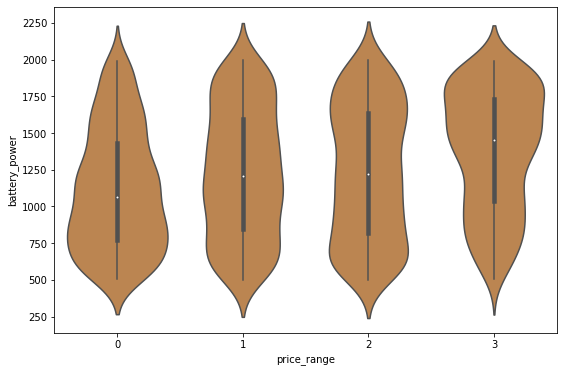

In [56]:
# Plotting violinplot for battery_power vs price_ranges
plt.figure(figsize=(9,6))
sns.violinplot(x = 'price_range', y = 'battery_power', data = df, color="peru")

* Also in battery_power, price_range0 has denser part in 750mAh, in price_range1 density is more in 1100mAh, in price_range2 density is more in 700 and 1700mAh and in price_range3 density is more likely in 1800mAh


similarly we can interpret them this way, rest all are almost similar so let's plot them all together

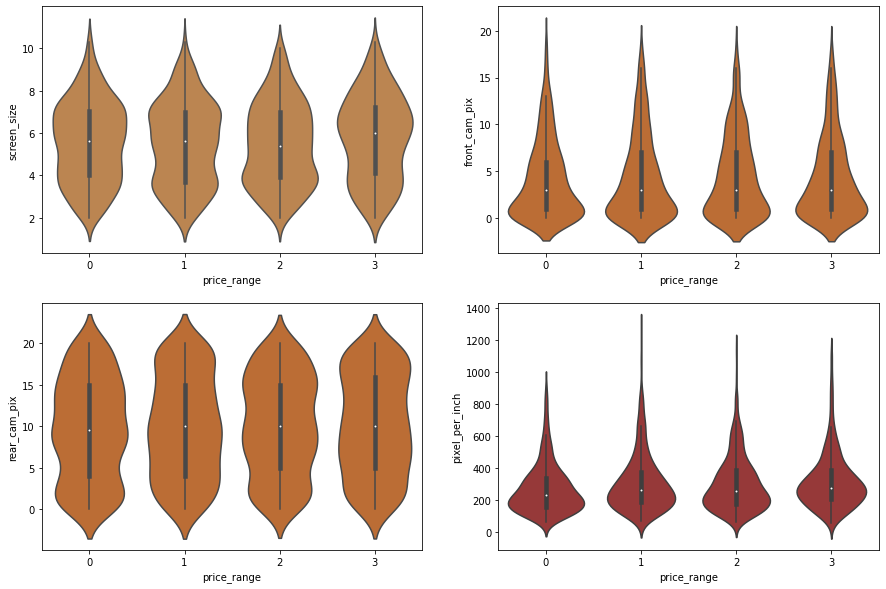

In [57]:
# Plotting violin plot for both continuous and distinct variables vs price range
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.violinplot(x = 'price_range', y = 'screen_size', data = df, color="peru")
plt.subplot(2,2,2)
sns.violinplot(x = 'price_range', y = 'front_cam_pix', data = df, color="chocolate")
plt.subplot(2,2,3)
sns.violinplot(x = 'price_range', y = 'rear_cam_pix', data = df, color="chocolate")
plt.subplot(2,2,4)
sns.violinplot(x = 'price_range', y = 'pixel_per_inch', data = df, color="brown")

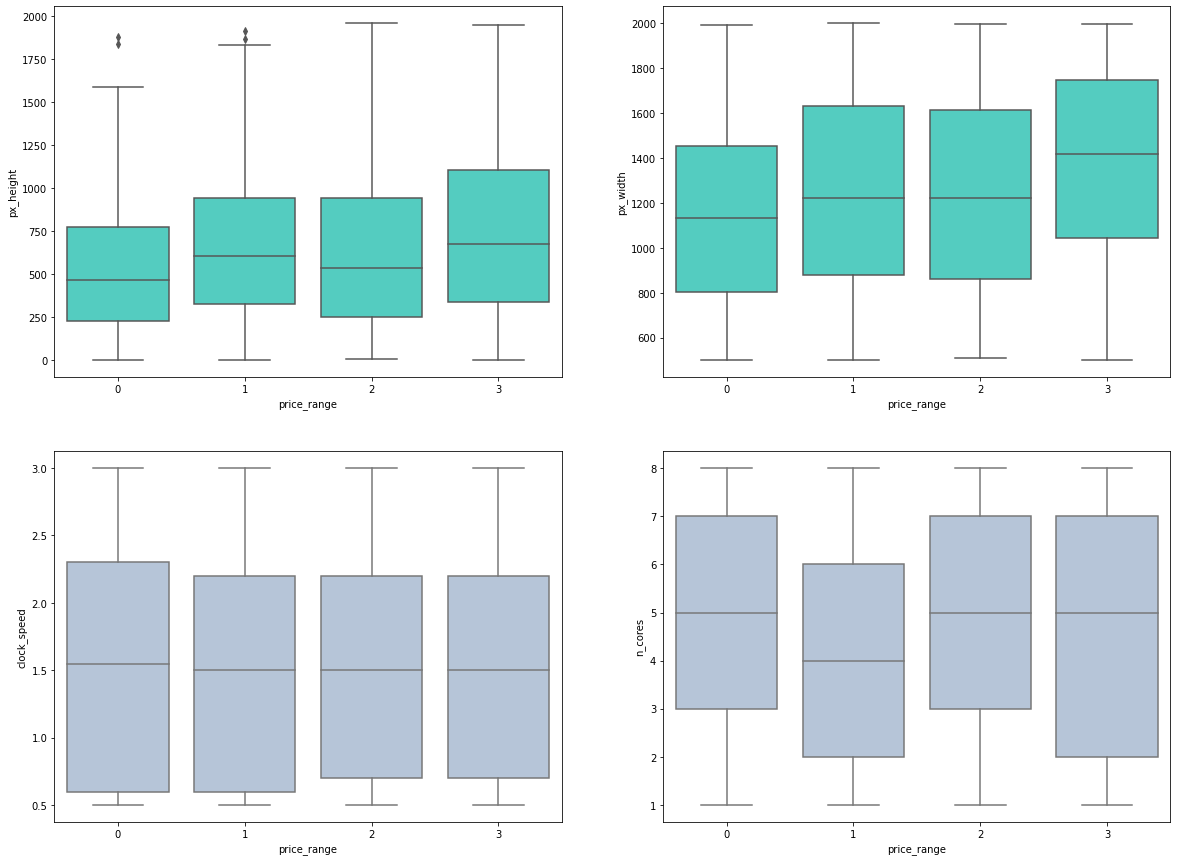

In [58]:
# Plotting box plot for both continuous and distinct variables vs price range
plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
sns.boxplot(x = 'price_range', y = 'px_height', data = df, color="turquoise")
plt.subplot(2,2,2)
sns.boxplot(x = 'price_range', y = 'px_width', data = df, color="turquoise")
plt.subplot(2,2,3)
sns.boxplot(x = 'price_range', y = 'clock_speed', data = df, color="lightsteelblue")
plt.subplot(2,2,4)
sns.boxplot(x = 'price_range', y = 'n_cores', data = df, color="lightsteelblue")

 Box_plot for few more variables with respect to price_ranges,
 * In pixel_height we can observe that interquartile range, median are increasing and decreasing with ranging classes
 * In pixel_width we can see that both interquartile range, medians are incresing gradually
 * In clock_speed its almost same 
 * In n_cores medians are same for price_range0,2,3 whereas in price_range1 it has been decreased also interquartile range

In [59]:
print(binary_features)               

['bluetooth', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', 'has_front_cam', 'has_rear_cam', 'hd_quality', 'slim_and_light_weight_touch_mob']


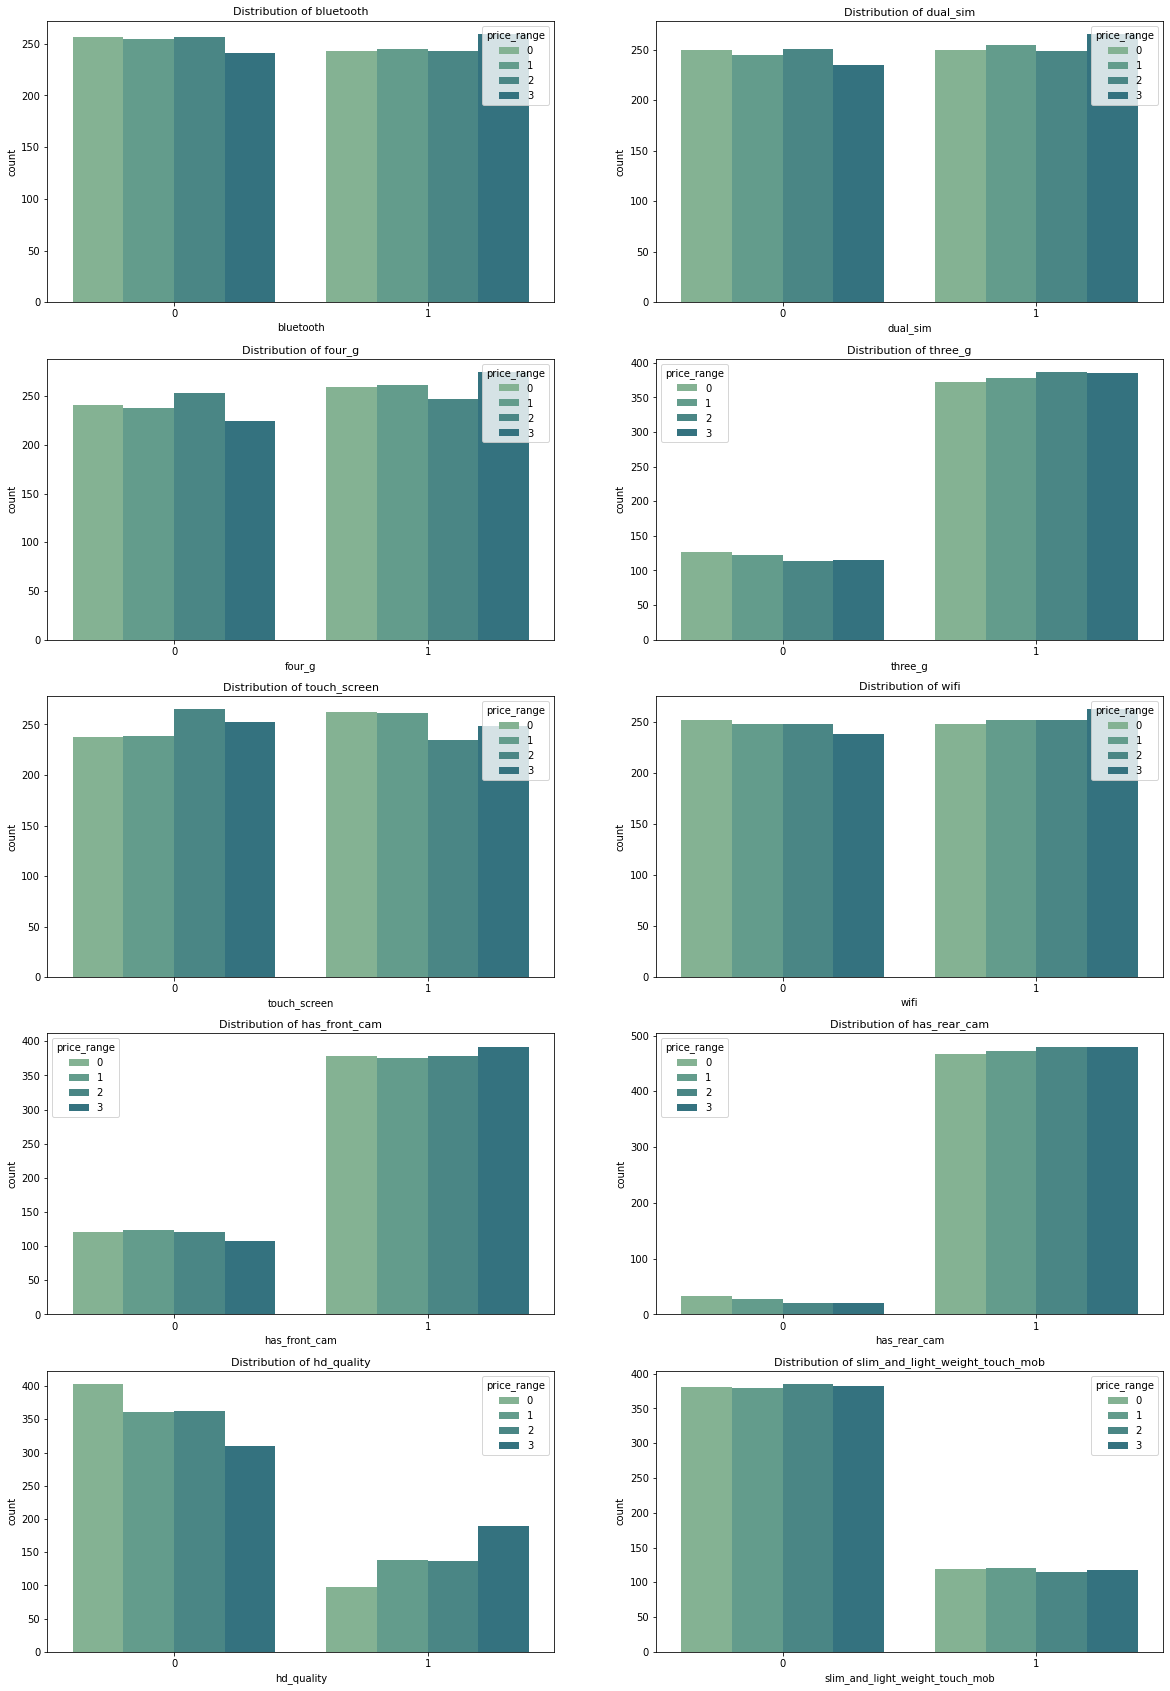

In [60]:
# plotting binary_features vs count with respect to price ranges
plt.figure(figsize=(20,30))
i = 0
for feature in binary_features:
  plt.subplot(5,2,i+1)
  sns.countplot(df[feature], hue = df['price_range'])

  plt.title(f'Distribution of {binary_features[i]}', color = 'black',fontsize = 11)
  i += 1

* In our dataset price_range0,1 has more counts about 250 which has touchscreen availability
* Distribution of wifi is equal for both availability and non availability
* No much difference in front and rear camera availability with respect to price_range classes
* In hd_quality price_range3 has a count of 180 which has hd_quality mobiles
* No much difference in slim and light mobiles with respect to price_ranges

## Multivariate Analysis

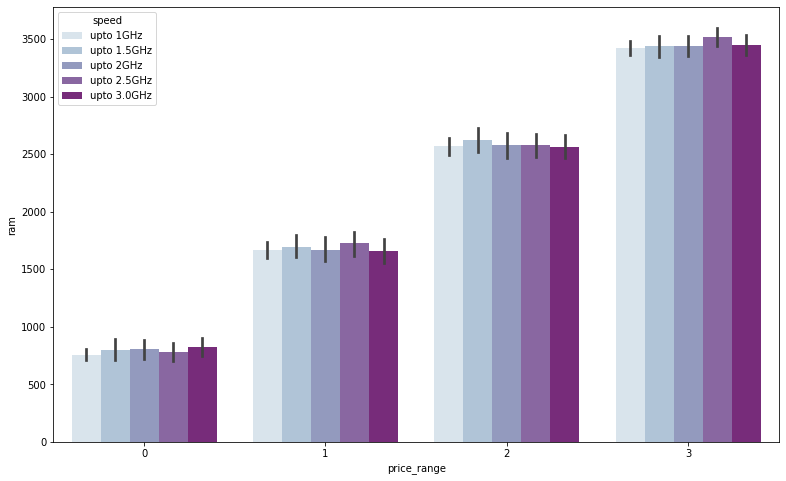

In [61]:
# plotting price_range vs ram and speed range
plt.figure(figsize = (13, 8))

sns.barplot(df['price_range'], df['ram'], hue= df['speed'], palette = 'BuPu')

Speed is available for all type of price range equally with certaing range of ram

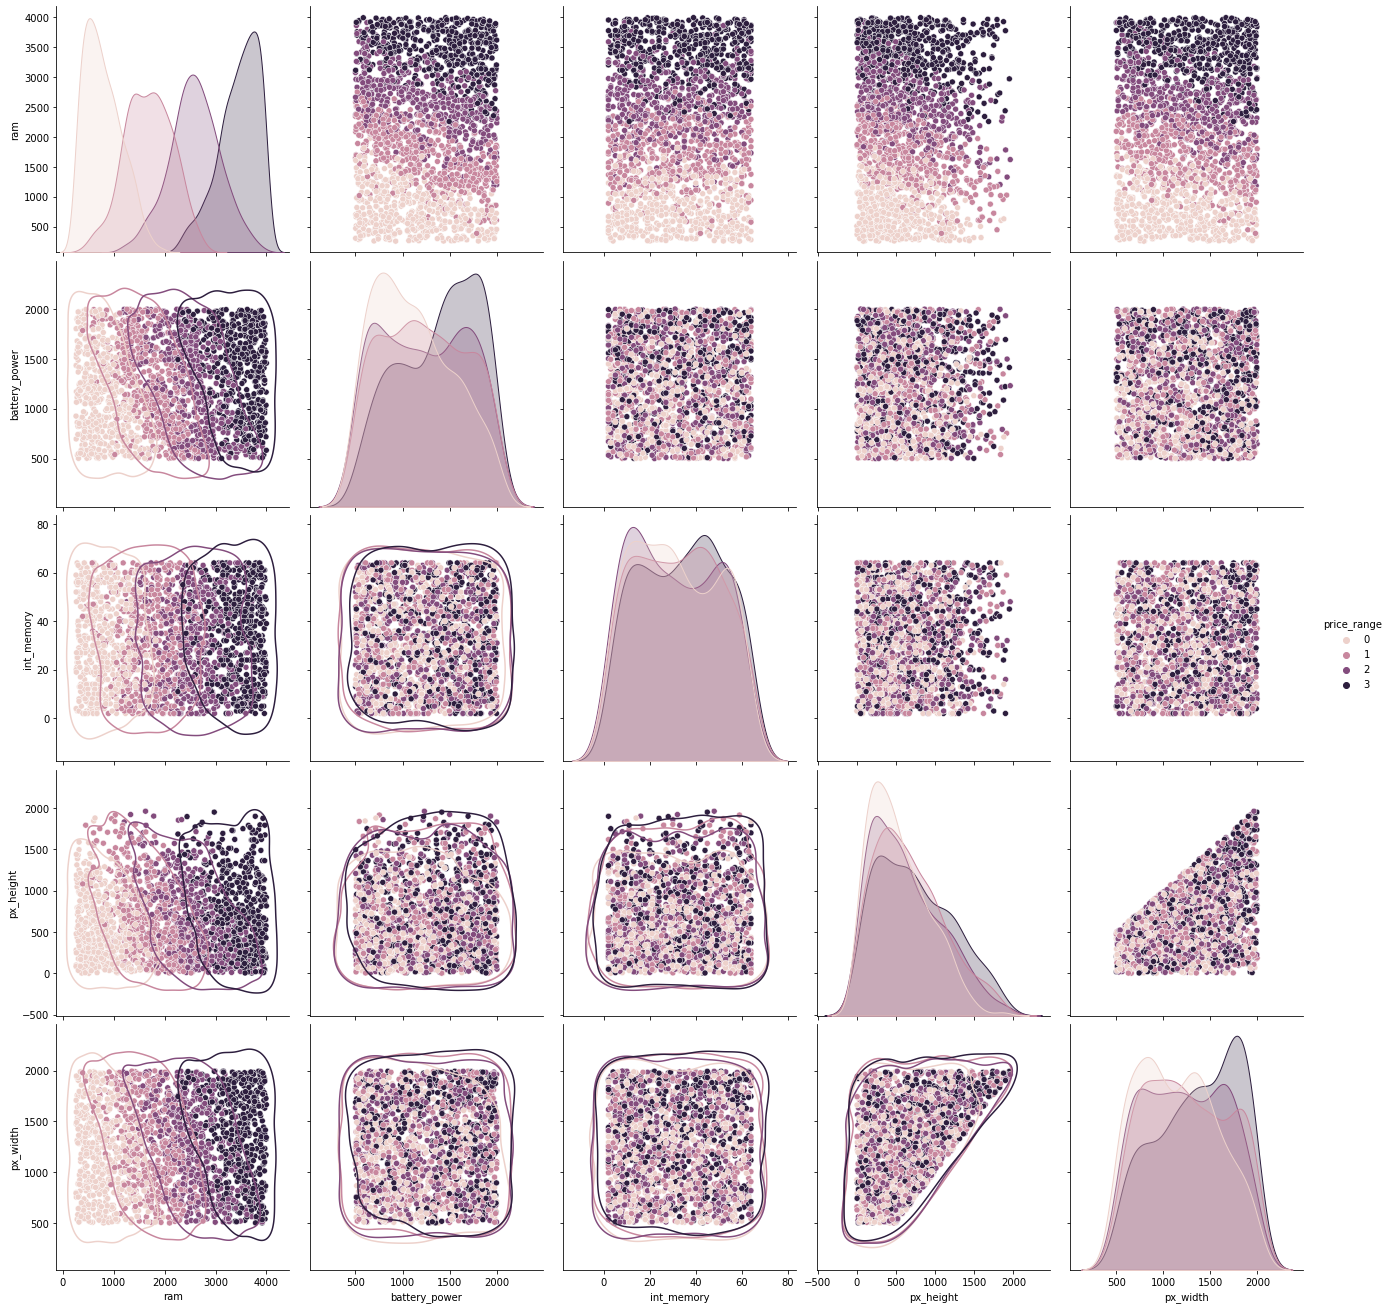

In [62]:
g = sns.pairplot(df,vars=['ram',"battery_power","int_memory","px_height","px_width",],hue="price_range",size=3.7)
g.map_lower(sns.kdeplot, levels=2,color=".2")

* In the diagonal its litreally the distribution of each variable to their certain calsses, which made easy by our pairplot, as in the above ram bivariate analysis we plotted them separetly, with help of pairplot we can easily vistualise particular variables distribution with respect to thier classes, in this way we can easily plot pairplot to analyse distribution or interpret each variable to their respective classes  
* Also only Ram vs other variables are distinguised properly between classes and with help of KDE its segregated well (our 4 price ranges).
* Rest all combinations are'nt good for interpretation, which means all classes are scattered all around 

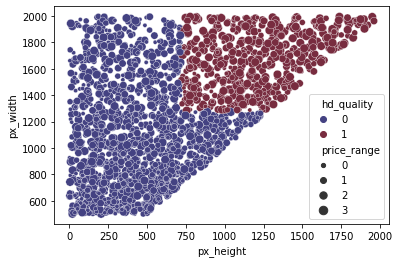

In [63]:
# plotting scatter for px_height vs px_width and annotating them with hd or not hd and price_range as sizes
sns.scatterplot(df["px_height"],df["px_width"],hue=df["hd_quality"],size=df["price_range"],palette = 'icefire')

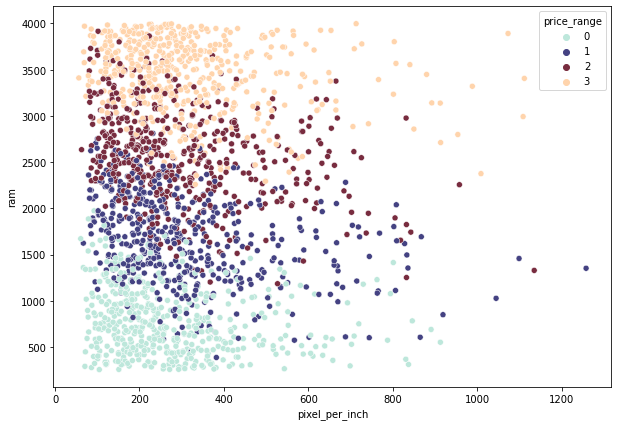

In [64]:
# plotting scatter for ram vs pixel_per_inch and annotating them with price_ranges
plt.figure(figsize = (10, 7))
sns.scatterplot(df["pixel_per_inch"],df["ram"],hue=df["price_range"],palette = 'icefire')

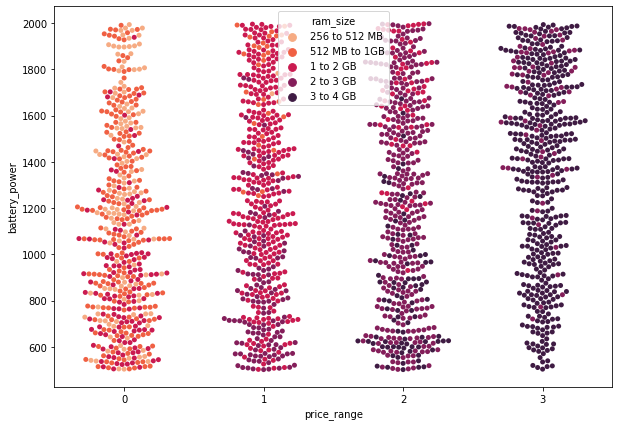

In [65]:
# Swarmplot for better vistualization with different calsses
plt.figure(figsize = (10, 7))
sns.swarmplot(df['price_range'], df['battery_power'], hue = df['ram_size'], palette = 'rocket_r')

* All range of battery power is avail in different ranges
* Phone with price range 3 more likely to have a higher battery power and ram_size 2-4gb compared to phone in price range 1 and 2 
* Price0 has 256 to 1gb ram_size with low to high battery power
* price1 has 500 to 2gb ram_size with low and as well as high battery power
* Price3 has 1 to 3gb ram_size with low to high battery power
* Price4 has only 2 to 4 gb ram_size with all ranges of battery_power

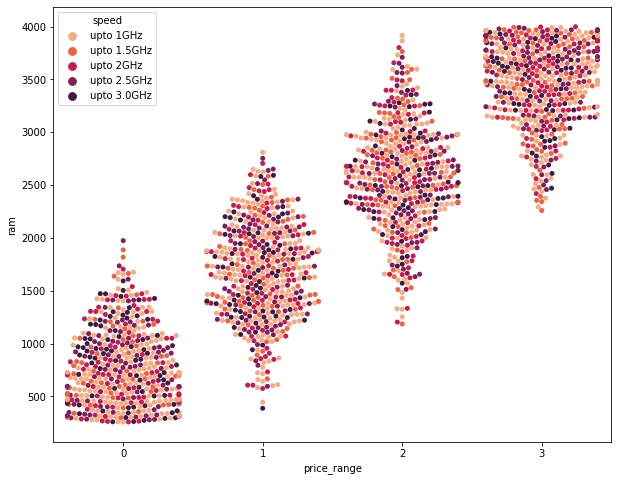

In [66]:
#Ram vs clockspeed and price_range

plt.figure(figsize = (10, 8))
sns.swarmplot(df['price_range'], df['ram'], hue = df['speed'], palette = 'rocket_r')

From the above plot we can visualize many overlapping that even with small ram it's possible to haveup to 3 GHz clock speed

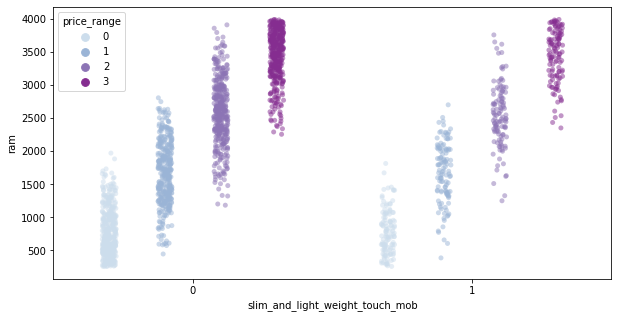

In [67]:
# plotting stripplot for binary variable
plt.figure(figsize = (10, 5))
sns.stripplot(df['slim_and_light_weight_touch_mob'], df['ram'], hue = df['price_range'], dodge=True, jitter=True, alpha = 0.5, \
             palette = 'BuPu')

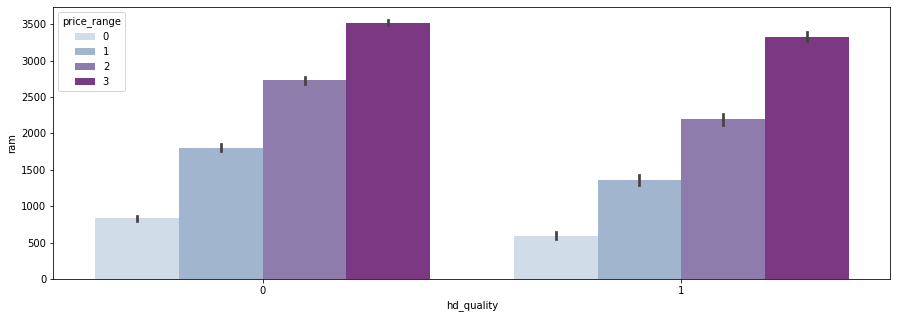

In [68]:
plt.figure(figsize = (15, 5))

sns.barplot(df['hd_quality'], y = df['ram'], hue = df['price_range'], palette = 'BuPu')

### Data preparation for Logistic Regression

Since they follow similar assumptions as that of linear regression let's try to satisfy those assumptions and implement our model

In [69]:
# Copy for data preprocessing
df_pre = df.copy()

In [70]:
# We derived usefull variables form this and few were for plotting purpose, so lets drop them
df_pre = df_pre.drop(["px_height","px_width","screen_height","screen_width","ram_size","speed"],axis=1)

One of the assumption is Absence of Multicollinearity, so lets plot heatmaps and check them

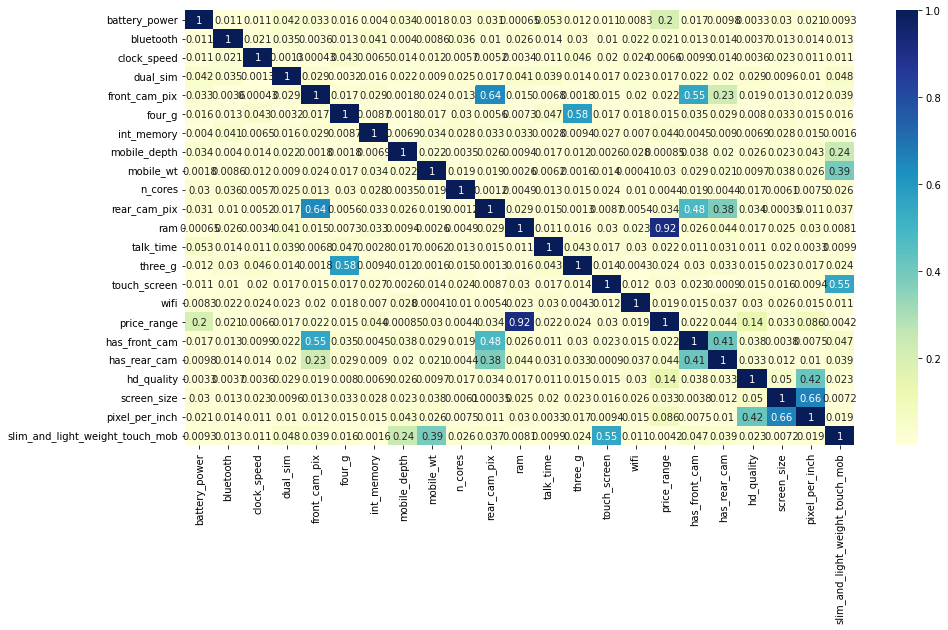

In [71]:
# plotting Heatmap for removing most correlated features
plt.figure(figsize=(15,8))
correlation = df_pre.corr()
sns.heatmap(abs(correlation), annot=True, cmap='YlGnBu')

Since most of the variable correlation is below 0.5 which is good correlation score lets go on with to calculate VIF and reduce our variable

Most of all Collinearity can exist between three or more variables even if no pair of variable is seen to have an exceptionally high correlation. Hence, VIF is a better way to assess multicollinearity

In [72]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [73]:
# Dropping columns with above 10 Variance influnece factor
feature_selection = calc_vif(df_pre[[i for i in df_pre.describe().columns if i not in ['price_range',"mobile_wt","has_rear_cam","screen_size"]]])
feature_selection

variables       VIF
0                     battery_power  7.613923
1                         bluetooth  1.973097
2                       clock_speed  4.120398
3                          dual_sim  1.992027
4                     front_cam_pix  3.912222
5                            four_g  3.190185
6                        int_memory  3.847799
7                      mobile_depth  4.158310
8                           n_cores  4.452988
9                      rear_cam_pix  6.451620
10                              ram  4.544004
11                        talk_time  4.682319
12                          three_g  6.029692
13                     touch_screen  2.972436
14                             wifi  1.988579
15                    has_front_cam  6.094125
16                       hd_quality  1.701809
17                   pixel_per_inch  4.699838
18  slim_and_light_weight_touch_mob  2.056441

Since most of the columns in our data doesn't help is price range prediction, we can blindly drop the rest all variables by just keeping the above printed dataframe


In [74]:
# keeping variables which have under 10 VIF value
feature_selected_columns_by_vif = feature_selection["variables"].value_counts().index

In [75]:
# Defining X and Y
X= df_pre[feature_selected_columns_by_vif]
y = df_pre["price_range"]

In [76]:
print(X.shape)
print(y.shape)

(2000, 19)
(2000,)


In [77]:
# splitting x,y for Train and Test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(1600, 19)
(400, 19)


# Logistic Regression

In [78]:
# Importing required libraries
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix,roc_auc_score,classification_report
from sklearn.metrics import roc_curve, auc
%matplotlib inline

We've chosen multi_class as multinomial which is unlike OneVsRest but learns a true multinomial logistic regression which gives a better probability estimates, solvers was chosen to be newton-cg which is robust to unscaled dataset and only uses l2 regularization

In [79]:
# hyper_parameter tuning for our model
from sklearn.model_selection import GridSearchCV
penalty=["l1","l2"]
max_iter= [80,100,140]
c_values = [100, 10, 1.0, 0.1, 0.01]

In [80]:
# Gridsearch to find optimal parameters
param_grid = dict(max_iter= max_iter,C=c_values, penalty=penalty)
log_reg = LogisticRegression(multi_class='multinomial', solver="newton-cg")
grid = GridSearchCV(estimator= log_reg, param_grid=param_grid, cv=5)
grid_result = grid.fit(X_train,y_train)

In [81]:
# printing best parameters and their scores
print(grid_result.best_score_)
print(grid_result.best_estimator_)
print(grid_result.best_params_)

0.8899999999999999
LogisticRegression(max_iter=140, multi_class='multinomial', solver='newton-cg')
{'C': 1.0, 'max_iter': 140, 'penalty': 'l2'}


In [82]:
# Defining best parameters to our logistic model
log_reg = LogisticRegression(multi_class='multinomial', solver="newton-cg",C=1.0 ,max_iter= 140, penalty= "l2")
log_reg = log_reg.fit(X_train,y_train)
log_reg.coef_

array([[-9.91859322e-03, -1.55437322e-02, -9.30464365e-03,
        -4.66115283e+00,  4.77682216e-01,  4.80457694e-01,
         4.50389050e-01, -1.55084003e-02, -5.89768593e-03,
         1.24091353e-02, -4.02797381e-02, -5.96648693e-03,
         5.34137155e-03, -1.38914040e-02, -1.77874986e-04,
        -1.00439321e-01, -9.86709851e-03,  2.09997919e-01,
        -6.38768622e-01],
       [-3.01214338e-03, -4.56145318e-03, -2.26808095e-03,
        -1.61315033e+00,  9.99176916e-02,  2.19841518e-01,
         1.30106718e-01, -5.04968331e-03, -1.87297152e-02,
        -1.66962393e-02, -8.16974775e-02, -9.13176930e-02,
         2.76813956e-02, -5.49491236e-03,  7.09435517e-02,
         1.70006790e-02,  7.66949687e-02, -3.57350381e-02,
         1.47859814e-02],
       [ 3.46725366e-03,  5.50851852e-03,  3.66478356e-03,
         1.37347651e+00, -4.05564755e-01, -3.23836633e-01,
        -3.72896936e-01, -1.15530186e-01,  1.75824032e-03,
         9.44510951e-03,  7.42647534e-03,  3.34036093e-02,
    

In [83]:
# predictions in classes
y_pred_test_lr = log_reg.predict(X_test)
y_pred_train_lr = log_reg.predict(X_train)

In [84]:
# predictions in probabilities
y_pred_prob_test_lr = log_reg.predict_proba(X_test)
y_pred_prob_train_lr = log_reg.predict_proba(X_train)

In [86]:
from sklearn import metrics
accur=metrics.accuracy_score(y_pred_test_lr, y_test)
print(accur)

0.875


In [87]:
# actuals of first 10 values of test set
y_pred_test_lr[:10]

array([3, 0, 2, 1, 3, 0, 0, 3, 3, 1])

In [88]:
# predictions on first 10 values of test set
y_test[:10]

405     3
1190    0
1132    2
731     2
1754    2
1178    0
1533    0
1303    3
1857    3
18      1
Name: price_range, dtype: int64

In [90]:
# Calculating classification metrics on train and test data

#Test Data
lr_test_accuracy = accuracy_score(y_test, y_pred_test_lr)
lr_test_recall = recall_score(y_test, y_pred_test_lr, average='macro')
lr_test_precision = precision_score(y_test, y_pred_test_lr, average='macro')
lr_test_f1_score = f1_score(y_test, y_pred_test_lr, average='macro')
lr_test_roc_auc = roc_auc_score(y_test, y_pred_prob_test_lr,multi_class='ovr')

#Train Data
lr_train_accuracy = accuracy_score(y_train, y_pred_train_lr)
lr_train_recall = recall_score(y_train, y_pred_train_lr, average='macro')
lr_train_precision = precision_score(y_train, y_pred_train_lr, average='macro')
lr_train_f1_score = f1_score(y_train, y_pred_train_lr, average='macro')
lr_train_roc_auc = roc_auc_score(y_train, y_pred_prob_train_lr, multi_class='ovr')

In [215]:
print("The accuracy on test dataset is", lr_test_accuracy)
confusion_matrix(y_test, y_pred_test_lr)

The accuracy on test dataset is 0.875


array([[ 90,   5,   0,   0],
       [  3,  78,  11,   0],
       [  0,  12,  78,   9],
       [  0,   0,  10, 104]])

 Accuracy will require two inputs (i) actual class labels (ii)predicted class labels. To get the class labels from probabilities( these probabilities will be probabilities of getting a HIT), you can take a threshold of 0.5. Any probability above 0.5 will be labeled as class 1 and anything less than 0.5 will be labeled as class 0.

Basically it is calculated as correct prediction by total no. of prediction like in our case it can be (90+78+78+104)/400=0.875 fot test set data.

In [216]:
print("The recall score on test dataset is", lr_test_recall)
multilabel_confusion_matrix(y_test, y_pred_test_lr)

The recall score on test dataset is 0.8738384994105819


array([[[302,   3],
        [  5,  90]],

       [[291,  17],
        [ 14,  78]],

       [[280,  21],
        [ 21,  78]],

       [[277,   9],
        [ 10, 104]]])

Recall measures the model'ss ability to detect positive samples. its the ratio between the number of positive samples correcly classified as positive to the total number of positive samples. in our case TP/TP+FN, 
90/95 for price_range0, 78/92 for price_range1, 78/99 for price_range2 and 104/114 for price_Range3 averaging all this recall score we get 0.8738

In [217]:
print("The precision on test dataset is", lr_test_precision)
multilabel_confusion_matrix(y_test, y_pred_test_lr)

The precision on test dataset is 0.8742568343106228


array([[[302,   3],
        [  5,  90]],

       [[291,  17],
        [ 14,  78]],

       [[280,  21],
        [ 21,  78]],

       [[277,   9],
        [ 10, 104]]])

Precision is the ability of a model to identify only the relevant data points and is given by number of true positives divided by number of true positive plus false positives. In our case TP/TP+FP, 90/93 for price_range0, 78/95 for price_range1, 78/99 for price_range2 and 104/113 for price_Range3 averaging all this Precision score we get 0.8742

In [218]:
print("The F1 score on test dataset is", lr_test_f1_score)

The F1 score on test dataset is 0.8739624386978182


The F1 score is calculated based on the precision and recall of each class. It is the weighted average of the Precision and the recall scores. The F1 score reaches its perfect value at one and worst at 0.It is a very good way to show that a classifier has a good recall and precision values

In [91]:
# printing classification metrics
print("The accuracy on test dataset is", lr_test_accuracy)
print("The recall score on test dataset is", lr_test_recall)
print("The precision on test dataset is", lr_test_precision)
print("The F1 score on test dataset is", lr_test_f1_score)
print("The ROC AUC score on test dataset is", lr_test_roc_auc)

The accuracy on test dataset is 0.875
The recall score on test dataset is 0.8738384994105819
The precision on test dataset is 0.8742568343106228
The F1 score on test dataset is 0.8739624386978182
The ROC AUC score on test dataset is 0.9823979432085597


In [92]:
# printing classification metrics
print("The accuracy on train dataset is", lr_train_accuracy)
print("The recall score on train dataset is", lr_train_recall)
print("The precision on train dataset is", lr_train_precision)
print("The F1 score on train dataset is", lr_train_f1_score)
print("The ROC AUC on train dataset is", lr_train_roc_auc)

The accuracy on train dataset is 0.9
The recall score on train dataset is 0.9002154537774414
The precision on train dataset is 0.8999076603157371
The F1 score on train dataset is 0.900048883665388
The ROC AUC on train dataset is 0.989057226677532


In [208]:
from sklearn.metrics import log_loss
print(f"Cost function log loss is {log_loss(y_test, y_pred_prob_test_lr,labels=[0,1,2,3])}")

Cost function log loss is 0.2808575745830597


A good model should have a smaller log loss value.

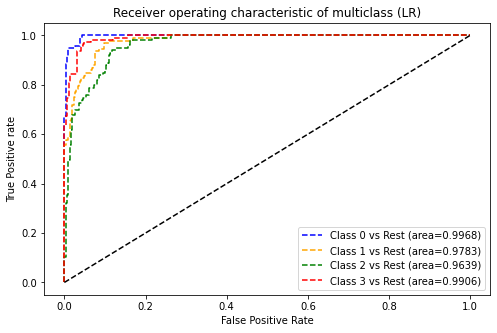

In [197]:
# plotting roc curve for each class according to logistic predictions
fpr = {}
tpr = {}
thresh = {}
roc_auc= {}
n_class= 4

for i in range(n_class):
  fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_prob_test_lr[:,i], pos_label=i )
  roc_auc[i] = (auc(fpr[i], tpr[i])).round(4)

plt.figure(figsize = (8, 5))
plt.plot(fpr[0], tpr[0], linestyle="--", color="blue", label= f"Class 0 vs Rest (area={roc_auc[0]})")
plt.plot(fpr[1], tpr[1], linestyle="--", color="orange", label= f"Class 1 vs Rest (area={roc_auc[1]})")
plt.plot(fpr[2], tpr[2], linestyle="--", color="green", label= f"Class 2 vs Rest (area={roc_auc[2]})")
plt.plot(fpr[3], tpr[3], linestyle="--", color="red", label= f"Class 3 vs Rest (area={roc_auc[3]})")
plt.plot([0, 1], [0, 1], "k--")
plt.title('Receiver operating characteristic of multiclass (LR)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

The AUC represents a model’s ability to discriminate between positive and negative classes. An area of 1.0 represents a model that made all predictions perfectly. An area of 0.5 represents a model as good as random.


A ROC Curve is a plot of the true positive rate and the false positive rate for a given set of probability predictions at different thresholds used to map the probabilities to class labels. The area under the curve is then the approximate integral under the ROC Curve.

from the above plot is simply the average of all classes, our auc-roc value is 0.9823 so we can say that our model predicted the classes in a good manner.

In [210]:
print("The ROC AUC score on test dataset is", lr_test_roc_auc)

The ROC AUC score on test dataset is 0.9823979432085597


In [95]:
# Printing multiclass confusion matrix
from sklearn.metrics import multilabel_confusion_matrix
ml_cm = multilabel_confusion_matrix(y_test, y_pred_test_lr)
print(ml_cm)

[[[302   3]
  [  5  90]]

 [[291  17]
  [ 14  78]]

 [[280  21]
  [ 21  78]]

 [[277   9]
  [ 10 104]]]


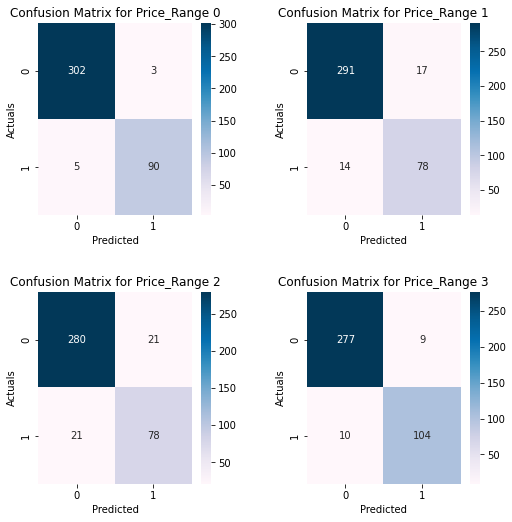

In [211]:
# Plotting multiclass confusion matrix

plt.figure(figsize=(8,8))

for i in range(0,4):
  ax= plt.subplot(2,2,i+1)
  sns.heatmap(ml_cm[i], annot=True,fmt="g", ax = ax, cmap= "PuBu")
  
  plt.title(f"Confusion Matrix for Price_Range {i}")
  plt.xlabel("Predicted")
  plt.ylabel("Actuals")

plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9,  wspace=0.4, hspace=0.4)

From the confusion matrix we can say that :

TP: True Positive: The values which were actually positive and were predicted positive.

FP: False Positive: The values which were actually negative but falsely predicted as positive.

FN: False Negative: The values which were actually positive but falsely predicted as negative.

TN: True Negative: The values which were actually negative and were predicted negative.

Ex: Taking confusion matrix for Price_Range 0

In our case,
* (TP) 90 instances of price_range0 were predicted correctly by the model, 

* in the same manner(TN) 302 instances which weren't price_range0 was predicted correctly,
* (FP) 3 instances which wasn't price_range0 were wrongly predicted as price_range0,
* (FN) 5 instances which were price_range0 but wrongly predicted as other price ranges   

In [97]:
confusion_matrix(y_train, y_pred_train_lr)

array([[385,  20,   0,   0],
       [ 23, 357,  28,   0],
       [  0,  28, 341,  32],
       [  0,   0,  29, 357]])

[Text(0, 0.5, 'PriceRange 0'),
 Text(0, 1.5, 'PriceRange 1'),
 Text(0, 2.5, 'PriceRange 2'),
 Text(0, 3.5, 'PriceRange 3')]

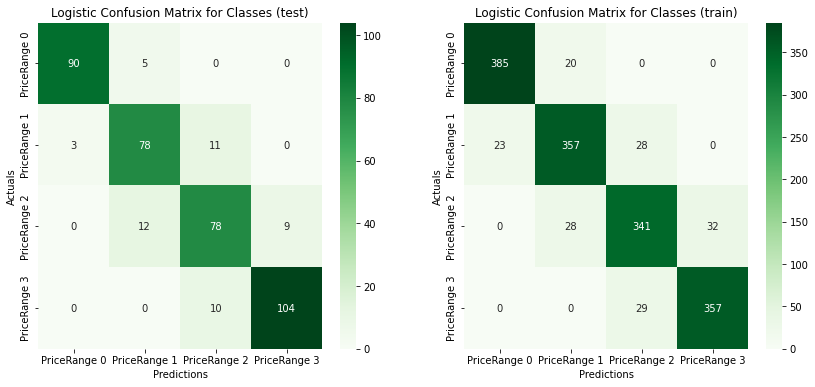

In [98]:
# Getting the confusion matrix for both train and test split

labels = ['PriceRange 0', 'PriceRange 1','PriceRange 2','PriceRange 3']
cm = confusion_matrix(y_test, y_pred_test_lr)
cm1 = confusion_matrix(y_train, y_pred_train_lr)

plt.figure(figsize=(14,6))
ax= plt.subplot(1,2,1)
sns.heatmap(cm, annot=True,fmt="g", ax = ax, cmap= "Greens"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predictions')
ax.set_ylabel('Actuals')
ax.set_title('Logistic Confusion Matrix for Classes (test)')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

ax= plt.subplot(1,2,2)
sns.heatmap(cm1, annot=True,fmt="g", ax = ax, cmap= "Greens"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predictions')
ax.set_ylabel('Actuals')
ax.set_title('Logistic Confusion Matrix for Classes (train)')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

Just the true positives in our diagonal, and false positive,negative to their respective classes

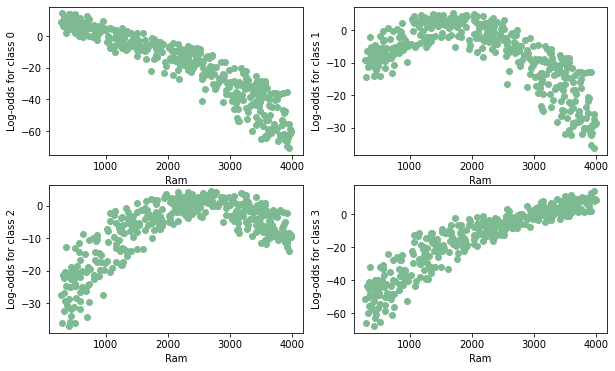

In [202]:
# plotting logit vs ram variable(test split) to determine if its fulfilling one of logistic assumptions

from IPython.core.pylabtools import figsize
from matplotlib import figure
log_odds = np.log(y_pred_prob_test_lr / (1 - y_pred_prob_test_lr))

plt.figure(figsize = (10, 6))
for i in range(0,4):
  plt.subplot(2,2,i+1)
  plt.scatter(x=X_test['ram'].values, y=log_odds[:,i])
  plt.xlabel("Ram")
  plt.ylabel(f"Log-odds for class {i}")


* One of the assumptions of logistic regression is that the relationship between the logit (aka log-odds) of the outcome and each continuous independent variable is linear.

* From the EDA part we can clearly say ram is one of the continuous variable which is directly dependent to price prediction, so we're picking one variable and checking our assumption, plotting log of odds for different classes vs ram variable, we can interpret that class 1 and 2 are more likely to be non linear, whereas class 0 and 3 have almost linear relationship with ram.

* We can clearly see and vistualize that class 0 and 3 have more true positives than class 1 and 2 from our confusion matrix, they also have linear relationship btw log-odds and ram. unlike calss 1 and 2 which has low true positives and clearly violating logistic regression assumption 



# K-Nearest Neighbors

In [104]:
from sklearn.neighbors import KNeighborsClassifier

In [105]:
# Gridsearch to find optimal parameters

param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [106]:
# printing best scores and parameters
print(knn_cv.best_score_)
print(knn_cv.best_params_)

0.8512500000000001

In [108]:
# defining our model with best parameter
knn= KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=14)

In [204]:
#Predicting classes for both train and test split
y_pred_train_knn = knn.predict(X_train)
y_pred_test_knn = knn.predict(X_test)  

In [109]:
#Predicting probabilities for both train and test split
y_pred_prob_train_knn = knn.predict_proba(X_train)
y_pred_prob_test_knn = knn.predict_proba(X_test)  

In [111]:
# Actuals of first 10 test classes
y_test[:10]

405     3
1190    0
1132    2
731     2
1754    2
1178    0
1533    0
1303    3
1857    3
18      1
Name: price_range, dtype: int64

In [112]:
# predictions of first 10 test classes
y_pred_test_knn[:10]

array([3, 0, 2, 2, 3, 0, 0, 3, 3, 1])

In [113]:
# Calculating classification metrics on train and test data

#Test Data
knn_test_accuracy = accuracy_score(y_test, y_pred_test_knn)
knn_test_recall = recall_score(y_test, y_pred_test_knn, average='macro')
knn_test_precision = precision_score(y_test, y_pred_test_knn, average='macro')
knn_test_f1_score = f1_score(y_test, y_pred_test_knn, average='macro')
knn_test_roc_auc = roc_auc_score(y_test, y_pred_prob_test_knn,multi_class='ovr')

#Train Data
knn_train_accuracy = accuracy_score(y_train, y_pred_train_knn)
knn_train_recall = recall_score(y_train, y_pred_train_knn, average='macro')
knn_train_precision = precision_score(y_train, y_pred_train_knn, average='macro')
knn_train_f1_score = f1_score(y_train, y_pred_train_knn, average='macro')
knn_train_roc_auc = roc_auc_score(y_train, y_pred_prob_train_knn, multi_class='ovr')

In [114]:
print("The accuracy for KNN in test split is", knn_test_accuracy)
print("The recall score for KNN in test split is", knn_test_recall)
print("The precision for KNN in test split is", knn_test_precision)
print("The F1 score for KNN in test split is", knn_test_f1_score)
print("The ROC AUC score for KNN in test split is", knn_test_roc_auc)

The accuracy for KNN in test split is 0.835
The recall score for KNN in test split is 0.8318430298407415
The precision for KNN in test split is 0.8303891353001771
The F1 score for KNN in test split is 0.8300845036794487
The ROC AUC score for KNN in test split is 0.9666050864163187


In [115]:
print("The accuracy for KNN in train split is", knn_train_accuracy)
print("The recall score for KNN in train split is", knn_train_recall)
print("The precision for KNN in train split is", knn_train_precision)
print("The F1 score for KNN in train split is", knn_train_f1_score)
print("The ROC AUC for KNN in train split is", knn_train_roc_auc)

The accuracy for KNN in train split is 0.856875
The recall score for KNN in train split is 0.8565314009425208
The precision for KNN in train split is 0.8584309579640724
The F1 score for KNN in train split is 0.8567853691238145
The ROC AUC for KNN in train split is 0.9795514927491573


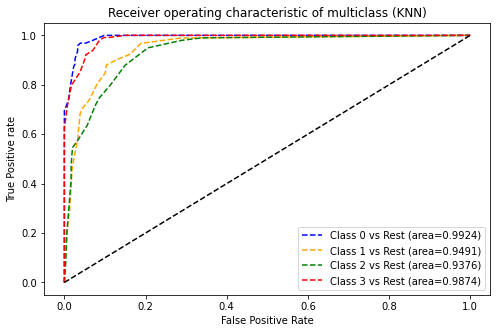

In [198]:
# plotting roc curve for each class according to K-Nearest neighbors predictions
fpr = {}
tpr = {}
thresh = {}
roc_auc= {}
n_class= 4

for i in range(n_class):
  fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_prob_test_knn[:,i], pos_label=i )
  roc_auc[i] = (auc(fpr[i], tpr[i])).round(4)

plt.figure(figsize = (8, 5))
plt.plot(fpr[0], tpr[0], linestyle="--", color="blue", label= f"Class 0 vs Rest (area={roc_auc[0]})")
plt.plot(fpr[1], tpr[1], linestyle="--", color="orange", label= f"Class 1 vs Rest (area={roc_auc[1]})")
plt.plot(fpr[2], tpr[2], linestyle="--", color="green", label= f"Class 2 vs Rest (area={roc_auc[2]})")
plt.plot(fpr[3], tpr[3], linestyle="--", color="red", label= f"Class 3 vs Rest (area={roc_auc[3]})")
plt.plot([0, 1], [0, 1], "k--")
plt.title('Receiver operating characteristic of multiclass (KNN)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

In [117]:
# Printing multiclass confusion matrix
ml_cm_knn = multilabel_confusion_matrix(y_test, y_pred_test_knn)
print(ml_cm_knn)

[[[295  10]
  [  6  89]]

 [[286  22]
  [ 20  72]]

 [[282  19]
  [ 31  68]]

 [[271  15]
  [  9 105]]]


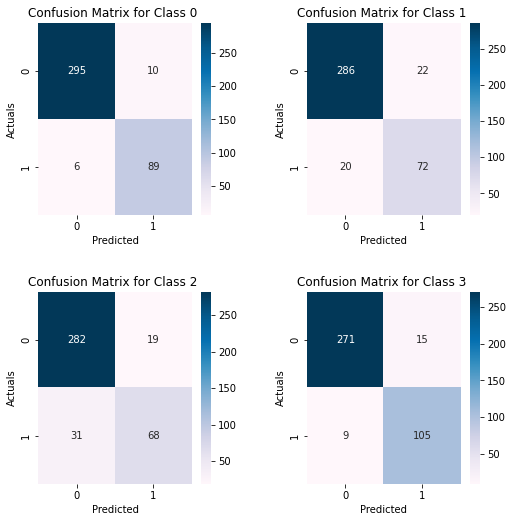

In [118]:
# Plotting multiclass confusion matrix
plt.figure(figsize=(8,8))

for i in range(0,4):
  ax= plt.subplot(2,2,i+1)
  sns.heatmap(ml_cm_knn[i], annot=True, fmt="g", ax = ax, cmap= "PuBu")

  plt.title(f"Confusion Matrix for Class {i} ")
  plt.xlabel("Predicted")
  plt.ylabel("Actuals")

plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9,  wspace=0.4, hspace=0.4)

In [119]:
confusion_matrix(y_train, y_pred_train_knn)

array([[386,  19,   0,   0],
       [ 43, 344,  21,   0],
       [  0,  56, 317,  28],
       [  0,   0,  62, 324]])

[Text(0, 0.5, 'PriceRange 0'),
 Text(0, 1.5, 'PriceRange 1'),
 Text(0, 2.5, 'PriceRange 2'),
 Text(0, 3.5, 'PriceRange 3')]

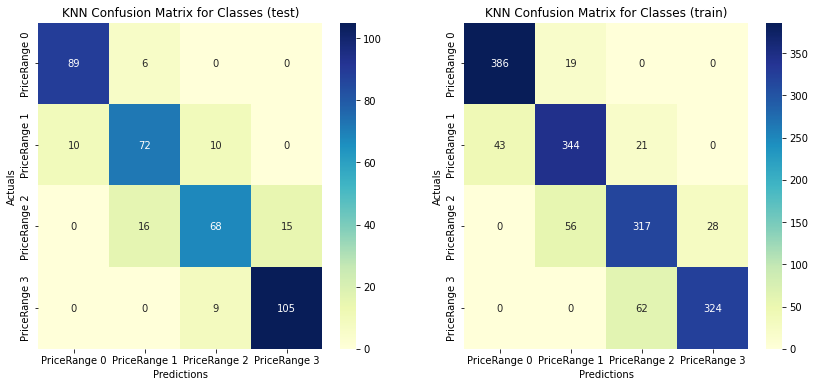

In [120]:
# Get the confusion matrix for both train and test

labels = ['PriceRange 0', 'PriceRange 1','PriceRange 2','PriceRange 3']
cm_knn_test = confusion_matrix(y_test, y_pred_test_knn)
cm_knn_train = confusion_matrix(y_train, y_pred_train_knn)

plt.figure(figsize=(14,6))
ax= plt.subplot(1,2,1)
sns.heatmap(cm_knn_test, annot=True,fmt="g", ax = ax, cmap= "YlGnBu"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predictions')
ax.set_ylabel('Actuals')
ax.set_title('KNN Confusion Matrix for Classes (test)')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

ax= plt.subplot(1,2,2)
sns.heatmap(cm_knn_train, annot=True,fmt="g", ax = ax, cmap= "YlGnBu"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predictions')
ax.set_ylabel('Actuals')
ax.set_title('KNN Confusion Matrix for Classes (train)')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# Support Vector Machines



In [121]:
# importing svm 
from sklearn import svm
svm_clf = svm.SVC()

In [122]:
# param_grid = [{'kernel': ['rbf'], 'gamma': [1, 0.1, 0.01, 0.0001],'C': [1, 10, 100, 1000]},{'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

# svm_cv = GridSearchCV(svm_clf, param_grid,n_jobs=2, cv=5, verbose = 10,scoring='accuracy')              

In [123]:
# svm_cv.fit(X_train,y_train)
# Fitting 5 folds for each of 20 candidates, totalling 100 fits
# GridSearchCV(cv=5, estimator=SVC(), n_jobs=2,
#              param_grid=[{'C': [1, 10, 100, 1000],
#                           'gamma': [1, 0.1, 0.01, 0.0001], 'kernel': ['rbf']},
#                          {'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
#              scoring='accuracy', verbose=10)

In [124]:
# print(svm_cv.best_params_)
# print(svm_cv.best_score_)
# {'C': 1, 'kernel': 'linear'}
# 0.88375

Above text is the best parameter obtained through GridSearchCV, C value as 1 which is default, but linear kernel was found to be optimal, since it took 30 mins to run this search we're directly loading this best params to our model.

In [125]:
# defining model and thier best params
svm_clf = svm.SVC(C=1, kernel="linear", probability= True)
svm_clf.fit(X_train,y_train)

SVC(C=1, kernel='linear', probability=True)

In [126]:
# predictions on train and test split
y_pred_train_svm = svm_clf.predict(X_train)
y_pred_test_svm = svm_clf.predict(X_test)

In [128]:
# probability predictions on train and test split
y_pred_prob_train_svm = svm_clf.predict_proba(X_train)
y_pred_prob_test_svm = svm_clf.predict_proba(X_test)

In [129]:
accuracy_score(y_test, y_pred_test_svm)

0.8675

In [130]:
# Calculating classification metrics on train and test data

#Test Data
svm_test_accuracy = accuracy_score(y_test, y_pred_test_svm)
svm_test_recall = recall_score(y_test, y_pred_test_svm, average='macro')
svm_test_precision = precision_score(y_test, y_pred_test_svm, average='macro')
svm_test_f1_score = f1_score(y_test, y_pred_test_svm, average='macro')
svm_test_roc_auc = roc_auc_score(y_test, y_pred_prob_test_svm,multi_class='ovr')

#Train Data
svm_train_accuracy = accuracy_score(y_train, y_pred_train_svm)
svm_train_recall = recall_score(y_train, y_pred_train_svm, average='macro')
svm_train_precision = precision_score(y_train, y_pred_train_svm, average='macro')
svm_train_f1_score = f1_score(y_train, y_pred_train_svm, average='macro')
svm_train_roc_auc = roc_auc_score(y_train, y_pred_prob_train_svm, multi_class='ovr')

In [131]:
print("The accuracy for SVM in test split is", svm_test_accuracy)
print("The recall score for SVM in test split is", svm_test_recall)
print("The precision for SVM in test split is", svm_test_precision)
print("The F1 score for SVM in test split is", svm_test_f1_score)
print("The ROC AUC score for SVM in test split is", svm_test_roc_auc)

The accuracy for SVM in test split is 0.8675
The recall score for SVM in test split is 0.8658241453435961
The precision for SVM in test split is 0.8665402784229155
The F1 score for SVM in test split is 0.8658769594250914
The ROC AUC score for SVM in test split is 0.9796448396872982


In [132]:
print("The accuracy for SVM in train split is", svm_train_accuracy)
print("The recall score for SVM in train split is", svm_train_recall)
print("The precision for SVM in train split is", svm_train_precision)
print("The F1 score for SVM in train split is", svm_train_f1_score)
print("The ROC AUC for SVM in train split is", svm_train_roc_auc)

The accuracy for SVM in train split is 0.905625
The recall score for SVM in train split is 0.905724088072833
The precision for SVM in train split is 0.9052623083199284
The F1 score for SVM in train split is 0.9054338000751732
The ROC AUC for SVM in train split is 0.9881040260476216


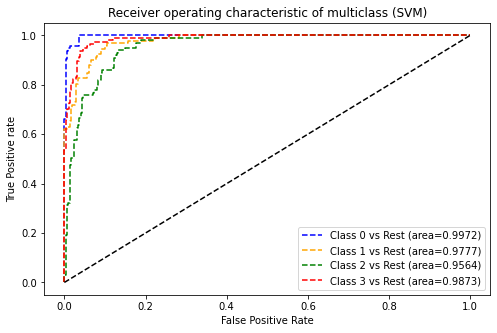

In [199]:
# plotting roc curve for each class according to SVM predictions
fpr = {}
tpr = {}
thresh = {}
roc_auc= {}
n_class= 4

for i in range(n_class):
  fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_prob_test_svm[:,i], pos_label=i )
  roc_auc[i] = (auc(fpr[i], tpr[i])).round(4)

plt.figure(figsize = (8, 5))
plt.plot(fpr[0], tpr[0], linestyle="--", color="blue", label= f"Class 0 vs Rest (area={roc_auc[0]})")
plt.plot(fpr[1], tpr[1], linestyle="--", color="orange", label= f"Class 1 vs Rest (area={roc_auc[1]})")
plt.plot(fpr[2], tpr[2], linestyle="--", color="green", label= f"Class 2 vs Rest (area={roc_auc[2]})")
plt.plot(fpr[3], tpr[3], linestyle="--", color="red", label= f"Class 3 vs Rest (area={roc_auc[3]})")
plt.plot([0, 1], [0, 1], "k--")
plt.title('Receiver operating characteristic of multiclass (SVM)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

In [134]:
# printing multilabel confusion matrix
ml_cm_svm = multilabel_confusion_matrix(y_test, y_pred_test_svm)
print(ml_cm_svm)

[[[302   3]
  [  6  89]]

 [[289  19]
  [ 14  78]]

 [[281  20]
  [ 24  75]]

 [[275  11]
  [  9 105]]]


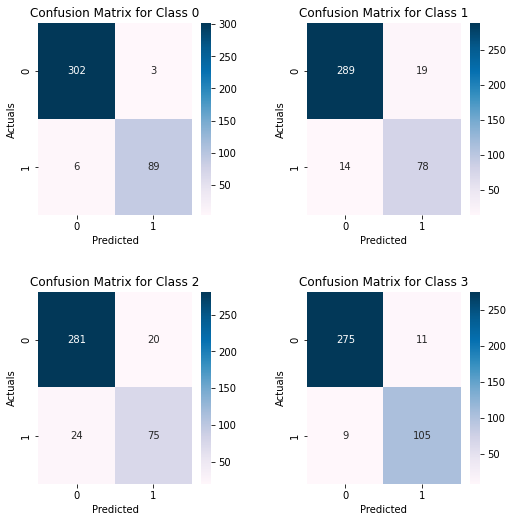

In [135]:
# plotting multilabel confusion matrix

plt.figure(figsize=(8,8))

for i in range(0,4):
  ax= plt.subplot(2,2,i+1)
  sns.heatmap(ml_cm_svm[i], annot=True, fmt="g", ax = ax, cmap= "PuBu")
  plt.title(f"Confusion Matrix for Class {i}")
  plt.xlabel("Predicted")
  plt.ylabel("Actuals")

plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9,  wspace=0.4, hspace=0.4)


In [136]:
confusion_matrix(y_test, y_pred_test_svm)

array([[ 89,   6,   0,   0],
       [  3,  78,  11,   0],
       [  0,  13,  75,  11],
       [  0,   0,   9, 105]])

[Text(0, 0.5, 'PriceRange 0'),
 Text(0, 1.5, 'PriceRange 1'),
 Text(0, 2.5, 'PriceRange 2'),
 Text(0, 3.5, 'PriceRange 3')]

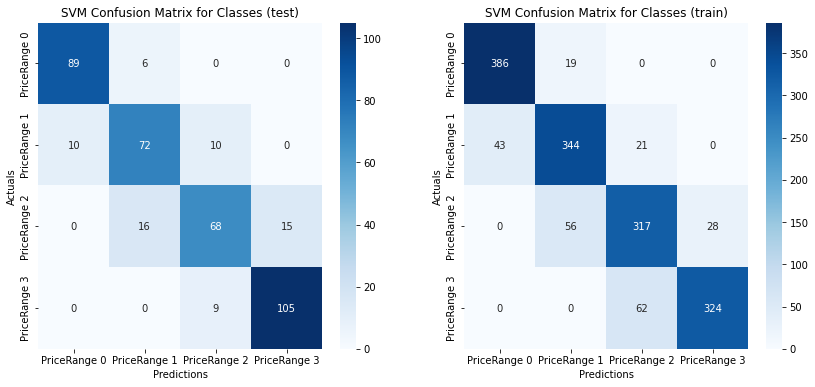

In [137]:
# Get the confusion matrix for both train and test

labels = ['PriceRange 0', 'PriceRange 1','PriceRange 2','PriceRange 3']
cm_svm_test = confusion_matrix(y_test, y_pred_test_knn)
cm_svm_train = confusion_matrix(y_train, y_pred_train_knn)

plt.figure(figsize=(14,6))
ax= plt.subplot(1,2,1)
sns.heatmap(cm_svm_test, annot=True,fmt="g", ax = ax, cmap= "Blues"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predictions')
ax.set_ylabel('Actuals')
ax.set_title('SVM Confusion Matrix for Classes (test)')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

ax= plt.subplot(1,2,2)
sns.heatmap(cm_svm_train, annot=True,fmt="g", ax = ax, cmap= "Blues"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predictions')
ax.set_ylabel('Actuals')
ax.set_title('SVM Confusion Matrix for Classes (train)')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# XGBoost Classifier

In [138]:
# importing xgboostclassifier
from xgboost import XGBClassifier

Since we're using tree model we are just modifying train and test split which was 80, 20% to 70 and 30% for betterment

In [139]:
# Resplitting x,y for tree models
X_train_tm, X_test_tm, y_train_tm, y_test_tm = train_test_split( X,y , test_size = 0.3, random_state = 0) 
print(X_train_tm.shape)
print(X_test_tm.shape)

(1400, 19)
(600, 19)


In [140]:
# Hyperparameter tuning

xgb_clf_cv = XGBClassifier(objective= "multi:softmax")
grid_values = {'n_estimators':[50, 80, 100], 'max_depth':[ 3, 5, 10]}
xgb_clf_cv = GridSearchCV(xgb_clf_cv, param_grid = grid_values, scoring = 'accuracy', cv=5)

# Fit the object to train dataset
xgb_clf_cv.fit(X_train_tm, y_train_tm)

GridSearchCV(cv=5, estimator=XGBClassifier(objective='multi:softmax'),
             param_grid={'max_depth': [3, 5, 10],
                         'n_estimators': [50, 80, 100]},
             scoring='accuracy')

In [141]:
print(xgb_clf_cv.best_params_)
print(xgb_clf_cv.best_score_)

{'max_depth': 3, 'n_estimators': 100}
0.8707142857142858


In [142]:
# pridictions for both train n test split
y_pred_train_xgb_ = xgb_clf_cv.predict(X_train_tm)
y_pred_test_xgb_ = xgb_clf_cv.predict(X_test_tm)

In [143]:
# probability pridictions for both train n test split
y_pred_prob_train_xgb_ = xgb_clf_cv.predict_proba(X_train_tm)
y_pred_prob_test_xgb_ = xgb_clf_cv.predict_proba(X_test_tm)

In [144]:
print(f"The accuracy score of Xgb for test split is {accuracy_score(y_test_tm, y_pred_test_xgb_)}")
print(f"The accuracy score of Xgb for train split is {accuracy_score(y_train_tm, y_pred_train_xgb_)}")

The accuracy score of Xgb for test split is 0.8866666666666667
The accuracy score of Xgb for train split is 0.9542857142857143


We can clearly see that Xgboost model's accuracy is good for train split but not so good on test split clear sign of overfitting , since our data has less observations and more noise(few features doesn't help in price range prediction) our xgb model is overfitting it, so to overcome overfitting we tune hyperparameters directly on by ourself i.e,


*   the ratio of features used (i.e. columns used); "colsample_bytree". Lower ratios avoid over-fitting

*   the ratio of the training instances used (i.e. rows used); "subsample". Lower ratios avoid over-fitting.

* the maximum depth of a tree; "max_depth". Lower values avoid over-fitting.


*  the minimum sum of instance weight needed in a leaf, in certain applications this relates directly to the minimum number of instances needed in a node; "min_child_weight". Larger values avoid over-fitting.

*   the minimum loss reduction required to make a further split; "gamma". Larger values avoid over-fitting.

In [145]:
# recreating xgb with hand picked hyper parameters value
xgb = XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=3, min_child_weight=4, gamma=7, subsample=0.6,
                      colsample_bytree=0.5, objective='multi:softmax', nthread=4, num_class=4, seed=27)
xgb.fit(X_train_tm,y_train_tm)

XGBClassifier(colsample_bytree=0.5, gamma=7, min_child_weight=4, nthread=4,
              num_class=4, objective='multi:softprob', seed=27, subsample=0.6)

In [146]:
# pridictions for both train n test split
y_pred_train_xgb = xgb.predict(X_train_tm)
y_pred_test_xgb = xgb.predict(X_test_tm)

In [147]:
# probability pridictions for both train n test split
y_pred_prob_train_xgb = xgb.predict_proba(X_train_tm)
y_pred_prob_test_xgb = xgb.predict_proba(X_test_tm)

In [148]:
print(f"The accuracy score of Xgb for test split is {accuracy_score(y_test_tm, y_pred_test_xgb)}")
print(f"The accuracy score of Xgb for train split is {accuracy_score(y_train_tm, y_pred_train_xgb)}")

The accuracy score of Xgb for test split is 0.8216666666666667
The accuracy score of Xgb for train split is 0.8414285714285714


This model isn't overfitting so let's move on to plotting roc and getting our confusion matrix

In [149]:
# Calculating classification metrics on train and test data

#Test Data
xgb_test_accuracy = accuracy_score(y_test_tm, y_pred_test_xgb)
xgb_test_recall = recall_score(y_test_tm, y_pred_test_xgb, average='macro')
xgb_test_precision = precision_score(y_test_tm, y_pred_test_xgb, average='macro')
xgb_test_f1_score = f1_score(y_test_tm, y_pred_test_xgb, average='macro')
xgb_test_roc_auc = roc_auc_score(y_test_tm, y_pred_prob_test_xgb,multi_class='ovr')

#Train Data
xgb_train_accuracy = accuracy_score(y_train_tm, y_pred_train_xgb)
xgb_train_recall = recall_score(y_train_tm, y_pred_train_xgb, average='macro')
xgb_train_precision = precision_score(y_train_tm, y_pred_train_xgb, average='macro')
xgb_train_f1_score = f1_score(y_train_tm, y_pred_train_xgb, average='macro')
xgb_train_roc_auc = roc_auc_score(y_train_tm, y_pred_prob_train_xgb, multi_class='ovr')

In [150]:
print("The accuracy for Xgboost in test split is", xgb_test_accuracy)
print("The recall score for Xgboost in test split is", xgb_test_recall)
print("The precision for Xgboost in test split is", xgb_test_precision)
print("The F1 score for Xgboost in test split is", xgb_test_f1_score)
print("The ROC AUC score for Xgboost in test split is", xgb_test_roc_auc)

The accuracy for Xgboost in test split is 0.8216666666666667
The recall score for Xgboost in test split is 0.8192292991809508
The precision for Xgboost in test split is 0.8165195951416351
The F1 score for Xgboost in test split is 0.8167941845332201
The ROC AUC score for Xgboost in test split is 0.9639540904431252


In [151]:
print("The accuracy for Xgboost in train split is", xgb_train_accuracy)
print("The recall score for Xgboost in train split is", xgb_train_recall)
print("The precision for Xgboost in train split is", xgb_train_precision)
print("The F1 score for Xgboost in train split is", xgb_train_f1_score)
print("The ROC AUC for Xgboost in train split is", xgb_train_roc_auc)

The accuracy for Xgboost in train split is 0.8414285714285714
The recall score for Xgboost in train split is 0.8424424124208616
The precision for Xgboost in train split is 0.8403510202360863
The F1 score for Xgboost in train split is 0.8409277625594738
The ROC AUC for Xgboost in train split is 0.9693382648624067


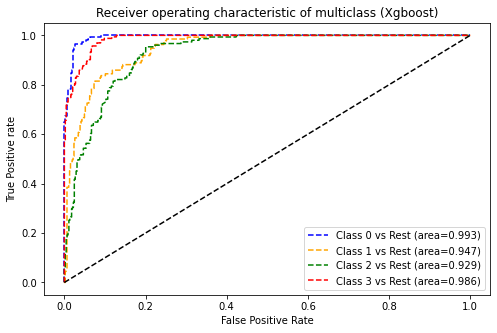

In [200]:
# plotting roc curve for each class according to XgBoost predictions
fpr = {}
tpr = {}
thresh = {}
roc_auc= {}
n_class= 4

for i in range(n_class):
  fpr[i], tpr[i], thresh[i] = roc_curve(y_test_tm, y_pred_prob_test_xgb[:,i], pos_label=i )
  roc_auc[i] = (auc(fpr[i], tpr[i])).round(3)

plt.figure(figsize = (8, 5))
plt.plot(fpr[0], tpr[0], linestyle="--", color="blue", label= f"Class 0 vs Rest (area={roc_auc[0]})")
plt.plot(fpr[1], tpr[1], linestyle="--", color="orange", label= f"Class 1 vs Rest (area={roc_auc[1]})")
plt.plot(fpr[2], tpr[2], linestyle="--", color="green", label= f"Class 2 vs Rest (area={roc_auc[2]})")
plt.plot(fpr[3], tpr[3], linestyle="--", color="red", label= f"Class 3 vs Rest (area={roc_auc[3]})")
plt.plot([0, 1], [0, 1], "k--")
plt.title('Receiver operating characteristic of multiclass (Xgboost)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

In [153]:
# printing multilabel_confusion_matrix
ml_cm_xgb = multilabel_confusion_matrix(y_test_tm, y_pred_test_xgb)
print(ml_cm_xgb)

[[[437  12]
  [  8 143]]

 [[431  34]
  [ 29 106]]

 [[415  34]
  [ 53  98]]

 [[410  27]
  [ 17 146]]]


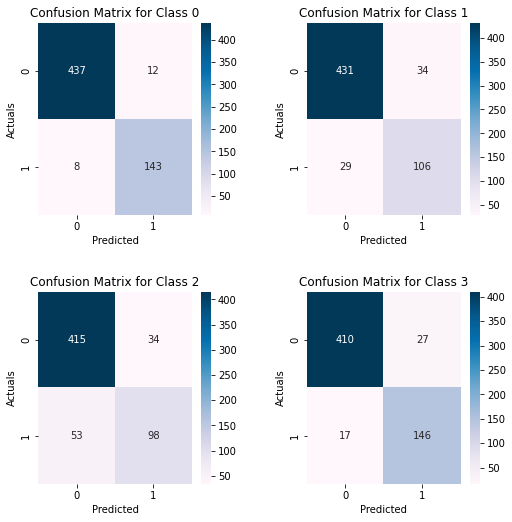

In [154]:
# plotting multilabel_confusion_matrix

plt.figure(figsize=(8,8))

for i in range(0,4):
  ax= plt.subplot(2,2,i+1)
  sns.heatmap(ml_cm_xgb[i], annot=True, fmt="g", ax = ax, cmap= "PuBu")

  plt.title(f"Confusion Matrix for Class {i}")
  plt.xlabel("Predicted")
  plt.ylabel("Actuals")
  
plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9,  wspace=0.4, hspace=0.4)


In [155]:
confusion_matrix(y_test_tm, y_pred_test_xgb)

array([[143,   8,   0,   0],
       [ 12, 106,  17,   0],
       [  0,  26,  98,  27],
       [  0,   0,  17, 146]])

[Text(0, 0.5, 'PriceRange 0'),
 Text(0, 1.5, 'PriceRange 1'),
 Text(0, 2.5, 'PriceRange 2'),
 Text(0, 3.5, 'PriceRange 3')]

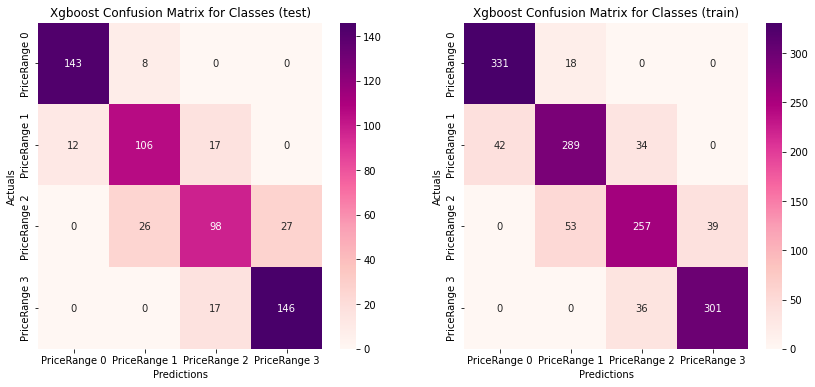

In [156]:
# Get the confusion matrix for both train and test

labels = ['PriceRange 0', 'PriceRange 1','PriceRange 2','PriceRange 3']
cm_xgb_test = confusion_matrix(y_test_tm, y_pred_test_xgb)
cm_xgb_train = confusion_matrix(y_train_tm, y_pred_train_xgb)

plt.figure(figsize=(14,6))
ax= plt.subplot(1,2,1)
sns.heatmap(cm_xgb_test, annot=True,fmt="g", ax = ax, cmap= "RdPu"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predictions')
ax.set_ylabel('Actuals')
ax.set_title('Xgboost Confusion Matrix for Classes (test)')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

ax= plt.subplot(1,2,2)
sns.heatmap(cm_xgb_train, annot=True,fmt="g", ax = ax, cmap= "RdPu"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predictions')
ax.set_ylabel('Actuals')
ax.set_title('Xgboost Confusion Matrix for Classes (train)')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# Bagging Classifier

In [157]:
from sklearn.ensemble import BaggingClassifier

In [158]:
# assigning hyper params on by ourself
bgclassifier = BaggingClassifier(base_estimator=log_reg, n_estimators=100,
                                 max_features=10,
                                 max_samples=100,
                                 random_state=1, n_jobs=5)

In [159]:
# fitting the model
bgclassifier.fit(X_train_tm, y_train_tm)

BaggingClassifier(base_estimator=LogisticRegression(max_iter=140,
                                                    multi_class='multinomial',
                                                    solver='newton-cg'),
                  max_features=10, max_samples=100, n_estimators=100, n_jobs=5,
                  random_state=1)

In [160]:
# pridictions on train and test split
y_pred_train_bg = bgclassifier.predict(X_train_tm)
y_pred_test_bg = bgclassifier.predict(X_test_tm)

In [161]:
# probability pridictions on train and test split
y_pred_prob_train_bg = bgclassifier.predict_proba(X_train_tm)
y_pred_prob_test_bg = bgclassifier.predict_proba(X_test_tm)

In [162]:
# Calculating classification metrics on train and test data

#Test Data
bg_test_accuracy = accuracy_score(y_test_tm, y_pred_test_bg)
bg_test_recall = recall_score(y_test_tm, y_pred_test_bg, average='macro')
bg_test_precision = precision_score(y_test_tm, y_pred_test_bg, average='macro')
bg_test_f1_score = f1_score(y_test_tm, y_pred_test_bg, average='macro')
bg_test_roc_auc = roc_auc_score(y_test_tm, y_pred_prob_test_bg,multi_class='ovr')

#Train Data
bg_train_accuracy = accuracy_score(y_train_tm, y_pred_train_bg)
bg_train_recall = recall_score(y_train_tm, y_pred_train_bg, average='macro')
bg_train_precision = precision_score(y_train_tm, y_pred_train_bg, average='macro')
bg_train_f1_score = f1_score(y_train_tm, y_pred_train_bg, average='macro')
bg_train_roc_auc = roc_auc_score(y_train_tm, y_pred_prob_train_bg, multi_class='ovr')

In [163]:
print("The accuracy for BaggingClassifier in test split is", bg_test_accuracy)
print("The recall score for BaggingClassifier in test split is", bg_test_recall)
print("The precision for BaggingClassifier in test split is", bg_test_precision)
print("The F1 score for BaggingClassifier in test split is", bg_test_f1_score)
print("The ROC AUC score for BaggingClassifier in test split is", bg_test_roc_auc)

The accuracy for BaggingClassifier in test split is 0.8533333333333334
The recall score for BaggingClassifier in test split is 0.8500768187844123
The precision for BaggingClassifier in test split is 0.8498667519890865
The F1 score for BaggingClassifier in test split is 0.849398219106349
The ROC AUC score for BaggingClassifier in test split is 0.9705930366573522


In [164]:
print("The accuracy for BaggingClassifier in train split is", bg_train_accuracy)
print("The recall score for BaggingClassifier in train split is", bg_train_recall)
print("The precision for BaggingClassifier in train split is", bg_train_precision)
print("The F1 score for BaggingClassifier in train split is", bg_train_f1_score)
print("The ROC AUC for BaggingClassifier in train split is", bg_train_roc_auc)

The accuracy for BaggingClassifier in train split is 0.8521428571428571
The recall score for BaggingClassifier in train split is 0.8529224707128057
The precision for BaggingClassifier in train split is 0.852352402706116
The F1 score for BaggingClassifier in train split is 0.8525614340484737
The ROC AUC for BaggingClassifier in train split is 0.9741569563911705


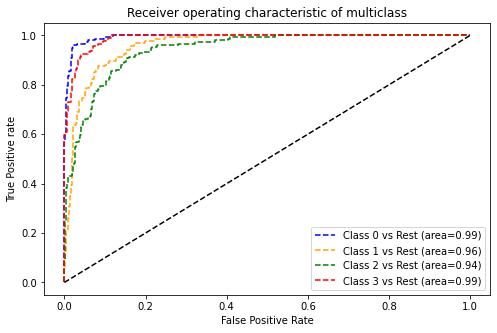

In [192]:
# plotting roc curve for each class according to BaggingClassifier predictions
fpr = {}
tpr = {}
thresh = {}
roc_auc= {}
n_class= 4

for i in range(n_class):
  fpr[i], tpr[i], thresh[i] = roc_curve(y_test_tm, y_pred_prob_test_bg[:,i], pos_label=i )
  roc_auc[i] = (auc(fpr[i], tpr[i])).round(2)

plt.figure(figsize = (8, 5))
plt.plot(fpr[0], tpr[0], linestyle="--", color="blue", label= f"Class 0 vs Rest (area={roc_auc[0]})")
plt.plot(fpr[1], tpr[1], linestyle="--", color="orange", label= f"Class 1 vs Rest (area={roc_auc[1]})")
plt.plot(fpr[2], tpr[2], linestyle="--", color="green", label= f"Class 2 vs Rest (area={roc_auc[2]})")
plt.plot(fpr[3], tpr[3], linestyle="--", color="red", label= f"Class 3 vs Rest (area={roc_auc[3]})")
plt.plot([0, 1], [0, 1], "k--")
plt.title('Receiver operating characteristic of multiclass')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

In [166]:
# printing multilabel_confusion_matrix
ml_cm_bg = multilabel_confusion_matrix(y_test_tm, y_pred_test_bg)
print(ml_cm_bg)

[[[438  11]
  [  7 144]]

 [[441  24]
  [ 29 106]]

 [[419  30]
  [ 40 111]]

 [[414  23]
  [ 12 151]]]


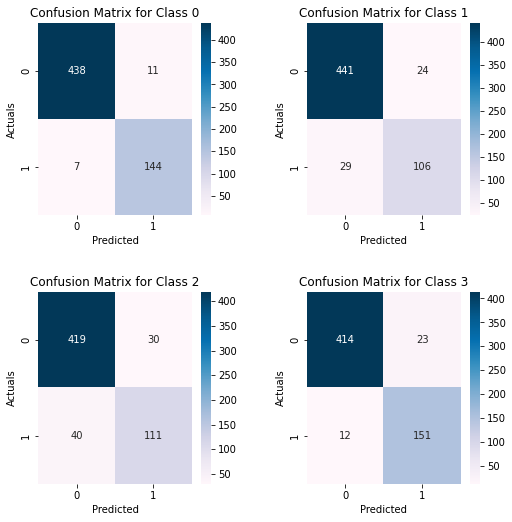

In [167]:
# plotting multilabel_confusion_matrix

plt.figure(figsize=(8,8))

for i in range(0,4):
  ax= plt.subplot(2,2,i+1)
  sns.heatmap(ml_cm_bg[i], annot=True, fmt="g", ax = ax, cmap= "PuBu")
  plt.title(f"Confusion Matrix for Class {i}")
  plt.xlabel("Predicted")
  plt.ylabel("Actuals")
plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9,  wspace=0.4, hspace=0.4)


In [168]:
confusion_matrix(y_test_tm, y_pred_test_bg)

array([[144,   7,   0,   0],
       [ 11, 106,  18,   0],
       [  0,  17, 111,  23],
       [  0,   0,  12, 151]])

[Text(0, 0.5, 'PriceRange 0'),
 Text(0, 1.5, 'PriceRange 1'),
 Text(0, 2.5, 'PriceRange 2'),
 Text(0, 3.5, 'PriceRange 3')]

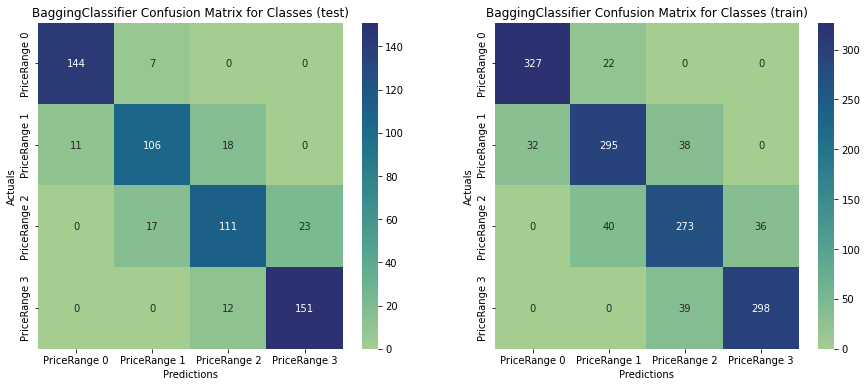

In [169]:
# Get the confusion matrix for both train and test

labels = ['PriceRange 0', 'PriceRange 1','PriceRange 2','PriceRange 3']
cm_bg_test = confusion_matrix(y_test_tm, y_pred_test_bg)
cm_bg_train = confusion_matrix(y_train_tm, y_pred_train_bg)

plt.figure(figsize=(15,6))
ax= plt.subplot(1,2,1)
sns.heatmap(cm_bg_test, annot=True,fmt="g", ax = ax, cmap= "crest"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predictions')
ax.set_ylabel('Actuals')
ax.set_title('BaggingClassifier Confusion Matrix for Classes (test)')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

ax= plt.subplot(1,2,2)
sns.heatmap(cm_bg_train, annot=True,fmt="g", ax = ax, cmap= "crest"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predictions')
ax.set_ylabel('Actuals')
ax.set_title('BaggingClassifier Confusion Matrix for Classes (train)')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# Model Evaluation

In [170]:
# Test metrics Dataframe
models =['Logistic regression','K Nearest Neighbours','Support Vector Machine','XGboost Classifier','Bagging Classifier']
metrics={"Accuracy":[lr_test_accuracy, knn_test_accuracy,svm_test_accuracy,xgb_test_accuracy,bg_test_accuracy],
         "Recall":[lr_test_recall,knn_test_recall,svm_test_recall,xgb_test_recall, bg_test_recall],
         "Precision":[lr_test_precision,knn_test_precision,svm_test_precision,xgb_test_precision,bg_test_precision],
          "f1_score":[lr_test_f1_score,knn_test_f1_score,svm_test_f1_score,xgb_test_f1_score,bg_test_f1_score],
          "ROC_AUC":[lr_test_roc_auc,knn_test_roc_auc,svm_test_roc_auc,xgb_test_roc_auc,bg_test_roc_auc]}
test_metrics_df=pd.DataFrame(data=metrics,index=models)
test_metrics_df

Accuracy    Recall  Precision  f1_score   ROC_AUC
Logistic regression     0.875000  0.873838   0.874257  0.873962  0.982398
K Nearest Neighbours    0.835000  0.831843   0.830389  0.830085  0.966605
Support Vector Machine  0.867500  0.865824   0.866540  0.865877  0.979645
XGboost Classifier      0.821667  0.819229   0.816520  0.816794  0.963954
Bagging Classifier      0.853333  0.850077   0.849867  0.849398  0.970593

In [171]:
# Train metrics Dataframe
model=['Logistic regression','K Nearest Neighbours','Support Vector Machine','XGboost Classifier','Bagging Classifier']
metrics={"Accuracy":[lr_train_accuracy,knn_train_accuracy,svm_train_accuracy,xgb_train_accuracy,bg_train_accuracy],
         "Recall":[lr_train_recall,knn_train_recall,svm_train_recall,xgb_train_recall,bg_train_recall],
         "Precision":[lr_train_precision,knn_train_precision,svm_train_precision,xgb_train_precision,bg_train_precision],
        'f1_score':[lr_train_f1_score,knn_train_f1_score,svm_train_f1_score,xgb_train_f1_score,bg_train_f1_score],
        "ROC_AUC":[lr_train_roc_auc,knn_train_roc_auc,svm_train_roc_auc,xgb_train_roc_auc,bg_train_roc_auc]}
train_metrics_df = pd.DataFrame(data=metrics,index=model)
train_metrics_df

Accuracy    Recall  Precision  f1_score   ROC_AUC
Logistic regression     0.900000  0.900215   0.899908  0.900049  0.989057
K Nearest Neighbours    0.856875  0.856531   0.858431  0.856785  0.979551
Support Vector Machine  0.905625  0.905724   0.905262  0.905434  0.988104
XGboost Classifier      0.841429  0.842442   0.840351  0.840928  0.969338
Bagging Classifier      0.852143  0.852922   0.852352  0.852561  0.974157

# Conclusion

* The quality of the phone increases with each price range.
* This is an old data, where 4G mobiles are in low numbers
* Also many mobiles do not have smartphone features.
*   Ram variable was 92% correlated with price range, higher the ram size higher the price range were, it was driving the price range

*   Out of all models Logistic Regression has done better predictions keeping accuracy as our main metric

*   All other models have done well too, but Logistic Regression outperformed them all

*   Since data was small and had noise our XGboost model was overfitting, we overcame after following few measures to handle overfitting problems

*   To be more precise in our prediction we can only take most important columns for price predictions like 6-7 top correlated variables w.r.t Price range for better scores, since most of the features in our data weren't helping price range prediction
